In [1]:
import math
import random
import openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
# List of the US cities:
us_cities = ["Abbeville", "Abbotsford", "Aberdeen", "Abilene", "Abingdon", "Abington", "Absecon", "Acampo", "Accokeek", "Achille", "Acme", "Acton", "Acushnet", "Acworth", "Ada", "Adair", "Adairsville", "Adams", "Adams Run", "Adamstown", "Adamsville", "Addieville", "Addis", "Addison", "Addyston", "Adel", "Adelanto", "Adena", "Adkins", "Adrian", "Advance", "Afton", "Agawam", "Agoura Hills", "Agra", "'Aiea", "Aiken", "Ailey", "Airville", "Ajo", "Akhiok", "Akron", "Alabaster", "Alameda", "Alamo", "Alamogordo", "Albany", "Albemarle", "Albert City", "Albert Lea", "Albertson", "Albertville", "Albia", "Albion", "Albrightsville", "Albuquerque", "Alburtis", "Alcoa", "Alden", "Aldie", "Aledo", "Alexander", "Alexander City", "Alexandria", "Alfred", "Alger", "Algoma", "Algonquin", "Alhambra", "Alice", "Aliceville", "Aliquippa", "Aliso Viejo", "Allegan", "Allen", "Allendale", "Allen Park", "Allenport", "Allenton", "Allentown", "Alliance", "Allison Park", "Alloway", "Allston", "Allyn", "Alma", "Almont", "Alna", "Alpena", "Alpha", "Alpharetta", "Alpine", "Alsip", "Alstead", "Altadena", "Altamont", "Altamonte Springs", "Altaville", "Alto", "Alton", "Alton Bay", "Altoona", "Altus", "Alva", "Alvarado", "Alvaton", "Alverda", "Alverton", "Alvin", "Alvord", "Amagansett", "Amanda", "Amargosa Valley", "Amarillo", "Ambler", "Ambridge", "Amelia", "Amelia Court House", "Amenia", "America", "American Canyon", "American Falls", "American Fork", "Americus", "Ames", "Amesbury", "Amesville", "Amherst", "Amissville", "Amite", "Amity", "Amityville", "Amory", "Amsterdam", "Amston", "Anacortes", "Anadarko", "Anaheim", "Anchorage", "Andalusia", "Anderson", "Andover", "Andrews", "Angie", "Angier", "Angleton", "Angola", "Angoon", "Anguilla", "Angwin", "Animas", "Aniwa", "Ankeny", "Anna", "Annandale", "Annapolis", "Ann Arbor", "Anniston", "Annville", "Anoka", "Anson", "Ansonia", "Antelope", "Anthony", "Antioch", "Antwerp", "Anza", "Apache Junction", "Apalachicola", "Apex", "Aplington", "Apollo", "Apollo Beach", "Apopka", "Apple Creek", "Appleton", "Apple Valley", "Appomattox", "Aptos", "Aquashicola", "Arab", "Aransas Pass", "Arbuckle", "Arcadia", "Arcanum", "Arcata", "Archbald", "Archer", "Archie", "Arcola", "Arden", "Ardmore", "Ardsley", "Arenzville", "Argenta", "Argillite", "Argyle", "Ariel", "Arkadelphia", "Arkansas City", "Arkdale", "Arley", "Arlington", "Arlington Heights", "Armagh", "Armington", "Armonk", "Armstrong", "Arnold", "Aromas", "Aroostook Band of Micmac Trust Land", "Arroyo Grande", "Artesia", "Arvada", "Arverne", "Arvin", "Asbury", "Asbury Park", "Ashburn", "Ashburnham", "Ashdown", "Asheboro", "Asheville", "Ashford", "Ashkum", "Ashland", "Ashland City", "Ashley", "Ashmore", "Ashtabula", "Ashville", "Askov", "Aspen", "Assonet", "Assumption", "Astatula", "Astor", "Astoria", "Atascadero", "Atchison", "Atco", "Atglen", "Athens", "Atherton", "Athol", "Atkinson", "Atlanta", "Atlantic", "Atlantic Beach", "Atlantic City", "Atlantic Highlands", "Atmore", "Atoka", "Attalla", "Attica", "Attleboro", "Attleboro Falls", "Atwater", "Atwood", "Auberry", "Aubrey", "Auburn", "Auburn Hills", "Au Gres", "Augusta", "Aumsville", "Aurora", "Austell", "Austin", "Ava", "Avalon", "Avenel", "Averill Park", "Avilla", "Avoca", "Avon", "Avondale", "Avondale Estates", "Avon Lake", "Axis", "Axton", "Ayer", "Aynor", "Azle", "Azusa", "Babb", "Babson Park", "Babylon", "Bacliff", "Baden", "Bahama", "Baileyton", "Bainbridge", "Bainbridge Island", "Bairdford", "Baker", "Bakersfield", "Bakersville", "Bala-Cynwyd", "Baldwin", "Baldwin City", "Baldwin Park", "Baldwin Place", "Baldwinsville", "Baldwinville", "Baldwyn", "Ball Ground", "Ballico", "Ballinger", "Ballston Lake", "Ballston Spa", "Ballwin", "Baltic", "Baltimore", "Bamberg", "Bancroft", "Bandera", "Bandon", "Bangor", "Banks", "Banner Elk", "Banning", "Bannister", "Baraboo", "Baraga", "Barbeau", "Barberton", "Barboursville", "Barbourville", "Bardstown", "Bargersville", "Barkhamsted", "Barnardsville", "Barnegat", "Barnesville", "Barnhart", "Barnstable", "Barnwell", "Barre", "Barrington", "Barrow", "Barryton", "Barryville", "Bartelso", "Bartlesville", "Bartlett", "Barto", "Bartow", "Basalt", "Basehor", "Basking Ridge", "Bassett", "Bastrop", "Batavia", "Batesville", "Bath", "Baton Rouge", "Battle Creek", "Battle Ground", "Bauxite", "Bay City", "Bayfield", "Bay Minette", "Bayonne", "Bayport", "Bay Saint Louis", "Bay Shore", "Bayside", "Bay Springs", "Baytown", "Bayview", "Bay Village", "Bayville", "Beach City", "Beachwood", "Beacon", "Beacon Falls", "Bealeton", "Beans Purchase", "Bean Station", "Beardstown", "Bear Lake", "Bearsville", "Beatrice", "Beattyville", "Beaufort", "Beaumont", "Beaver", "Beaver Dam", "Beaver Falls", "Beaver Springs", "Beaverton", "Becker", "Beckley", "Bedford", "Bedford Hills", "Bedminster", "Beebe", "Beech Bluff", "Beecher", "Beeville", "Bel Air", "Belchertown", "Belding", "Belen", "Belfair", "Belfast", "Belfield", "Belgrade", "Belhaven", "Belknap", "Bell", "Bellaire", "Bella Vista", "Bell Buckle", "Belle", "Belle Chasse", "Bellefonte", "Belle Plaine", "Bellerose", "Belle Vernon", "Belleview", "Belleville", "Bellevue", "Bellflower", "Bellingham", "Bell Island Hot Springs", "Bellmawr", "Bellmore", "Bellows Falls", "Bellport", "Bells", "Bellville", "Bellwood", "Belmar", "Belmont", "Beloit", "Belpre", "Belton", "Beltsville", "Belvidere", "Bement", "Benham", "Benicia", "Benkelman", "Ben Lomond", "Bennett", "Bennettsville", "Bennington", "Bensalem", "Bensenville", "Benson", "Bentleyville", "Benton", "Benton City", "Benton Harbor", "Benton Ridge", "Bentonville", "Benzonia", "Berea", "Bergen", "Bergenfield", "Berkeley", "Berkeley Springs", "Berkley", "Berlin", "Berlin Center", "Berlin Heights", "Berne", "Bernie", "Berrien Springs", "Berryton", "Berryville", "Berthoud", "Bertram", "Berwick", "Berwyn", "Bessemer", "Bessemer City", "Bethalto", "Bethania", "Bethany", "Bethel", "Bethel Park", "Bethel Springs", "Bethesda", "Bethlehem", "Bethpage", "Bettendorf", "Beulah", "Beverly", "Beverly Hills", "Biddeford", "Bidwell", "Big Bear Lake", "Big Creek", "Big Lake", "Big Pool", "Big Rapids", "Big Rock", "Big Sandy", "Big Spring", "Billerica", "Billings", "Biloxi", "Binghamton", "Birch Run", "Birchwood", "Bird City", "Bird in Hand", "Birdsboro", "Birmingham", "Bisbee", "Bishop", "Bishopville", "Bismarck", "Bitely", "Black Diamond", "Black Earth", "Blackfoot", "Black Hawk", "Blacklick", "Black Mountain", "Blacksburg", "Blackstone", "Blackwater", "Blackwood", "Blaine", "Blairstown", "Blairsville", "Blakeslee", "Blanchard", "Blanchester", "Blandon", "Bloomfield", "Bloomfield Hills", "Bloomingburg", "Bloomingdale", "Bloomington", "Bloomsburg", "Bloomsbury", "Bloomville", "Blossom", "Blossvale", "Blountstown", "Blountsville", "Blountville", "Blowing Rock", "Blue Ball", "Blue Bell", "Blue Earth", "Bluefield", "Blue Hill", "Blue Island", "Blue Point", "Blue Ridge", "Blue Springs", "Bluff City", "Bluffs", "Bluffton", "Blythe", "Blytheville", "Blythewood", "Boaz", "Boca Raton", "Bodega Bay", "Bodfish", "Boerne", "Bogalusa", "Bogart", "Bogota", "Bohannon", "Bohemia", "Boiling Springs", "Boise", "Bokchito", "Boligee", "Bolingbrook", "Bolivar", "Bolivia", "Bolton", "Bonaire", "Bondsville", "Bondurant", "Bonfield", "Bonham", "Bonifay", "Bonita", "Bonita Springs", "Bonners Ferry", "Bonner Springs", "Bonney Lake", "Bono", "Bonsall", "Boone", "Boones Mill", "Booneville", "Boonsboro", "Boonton", "Boonville", "Borger", "Boring", "Borrego Springs", "Bosque Farms", "Bossier City", "Bostic", "Boston", "Boswell", "Bothell", "Boulder", "Boulder City", "Boulder Creek", "Bound Brook", "Bountiful", "Bourbon", "Bourbonnais", "Bovard", "Bow", "Bow Center", "Bowie", "Bowling Green", "Boxford", "Boyce", "Boydton", "Boyers", "Boyertown", "Boyle", "Boynton Beach", "Bozeman", "Brackettville", "Bradenton", "Bradford", "Bradley", "Bradley Beach", "Bradshaw", "Brady", "Braidwood", "Braintree", "Branch Township", "Branchville", "Brandenburg", "Brandon", "Branford", "Branson", "Braselton", "Brasstown", "Brattleboro", "Brawley", "Brazil", "Brea", "Breckenridge", "Brecksville", "Breese", "Breinigsville", "Bremen", "Bremerton", "Brenham", "Brentwood", "Brewer", "Brewster", "Brewton", "Bricelyn", "Brick Township", "Bridge City", "Bridgehampton", "Bridgeport", "Bridgeton", "Bridgeview", "Bridgeville", "Bridgewater", "Bridgman", "Bridgton", "Brierfield", "Brigantine", "Brigham City", "Brighton", "Brightwaters", "Brightwood", "Brilliant", "Brimfield", "Brisbane", "Bristol", "Bristolville", "Bristow", "Britton", "Broad Brook", "Broadview", "Broadview Heights", "Broadway", "Brockport", "Brockton", "Brodhead", "Broken Arrow", "Bronxville", "Brookeland", "Brookfield", "Brookhaven", "Brookings", "Brookline", "Brooklyn", "Brook Park", "Brookport", "Brookshire", "Brooksville", "Brookville", "Brookwood", "Broomall", "Broomfield", "Broseley", "Broussard", "Browning", "Brownsburg", "Brownsdale", "Browns Mills", "Browns Summit", "Brownstown", "Brownsville", "Brownwood", "Bruin", "Bruning", "Brunswick", "Brush Prairie", "Brushton", "Brusly", "Bryan", "Bryans Road", "Bryant", "Bryn Mawr", "Bryson", "Bryson City", "Buchanan", "Buckeye", "Buckfield", "Buckhannon", "Buckingham", "Buckley", "Buckner", "Bucyrus", "Bud", "Buda", "Budd Lake", "Buellton", "Buena Park", "Buffalo", "Buffalo Grove", "Buford", "Buhl", "Bullard", "Bullhead City", "Bulverde", "Buna", "Bunceton", "Bunker Hill", "Bunkie", "Burbank", "Burgaw", "Burgettstown", "Burkburnett", "Burke", "Burkesville", "Burleson", "Burley", "Burlingame", "Burlington", "Burnet", "Burney", "Burneyville", "Burnsville", "Burnt Hills", "Burrton", "Burton", "Burtonsville", "Bushnell", "Butler", "Butner", "Butternut", "Buxton", "Byers", "Byesville", "Byfield", "Byhalia", "Byron", "Byron Center", "Cabazon", "Cabery", "Cabot", "Cache", "Caddo Mills", "Cadillac", "Cadiz", "Cadott", "Cadyville", "Cairnbrook", "Cairo", "Calabasas", "Caldwell", "Caledonia", "Calera", "Calexico", "Calhoun", "California", "California City", "Calipatria", "Calistoga", "Callahan", "Calumet", "Calumet City", "Calvert", "Calvert City", "Calverton", "Camanche", "Camano", "Camarillo", "Camas", "Cambria Heights", "Cambridge", "Camby", "Camden", "Camdenton", "Cameron", "Camillus", "Camino", "Campbell", "Campbell Hall", "Campbellsport", "Camp Hill", "Camp H M Smith", "Camp Meeker", "Campti", "Campton", "Camp Verde", "Canaan", "Canadensis", "Canadian", "Canal Fulton", "Canalou", "Canal Winchester", "Canandaigua", "Canastota", "Canby", "Candia", "Candler", "Caney", "Canfield", "Cannon Falls", "Canoga Park", "Canonsburg", "Canterbury", "Canton", "Cantonment", "Cantrall", "Canyon", "Canyon Country", "Canyon Lake", "Capac", "Cape Canaveral", "Cape Charles", "Cape Coral", "Cape Elizabeth", "Cape Girardeau", "Cape May", "Capeville", "Capitola", "Captiva", "Carbondale", "Carbon Hill", "Cardington", "Caribou", "Carle Place", "Carleton", "Carlinville", "Carlisle", "Carl Junction", "Carlsbad", "Carlstadt", "Carlton", "Carlyle", "Carman", "Carmel", "Carmel Valley", "Carmi", "Carmichael", "Carmichaels", "Carnation", "Carnegie", "Caro", "Carol Stream", "Carpentersville", "Carpinteria", "Carrboro", "Carriere", "Carrier Mills", "Carrizo Springs", "Carrizozo", "Carroll", "Carrollton", "Carson", "Carson City", "Carteret", "Cartersville", "Carterville", "Carthage", "Cartwright", "Caruthersville", "Carver", "Cary", "Caryville", "Casa Grande", "Cascade", "Casco", "Caseyville", "Cashiers", "Cashion", "Casper", "Cassadaga", "Cass City", "Casselberry", "Casselton", "Cassopolis", "Cassville", "Castaic", "Castle Rock", "Castleton", "Castleton-on-Hudson", "Castlewood", "Castro Valley", "Castroville", "Catasauqua", "Cataula", "Catawissa", "Cathedral City", "Catheys Valley", "Catlett", "Catlettsburg", "Catoosa", "Catron", "Catskill", "Cavour", "Cayce", "Cazadero", "Cecil", "Cedarburg", "Cedar City", "Cedar Creek", "Cedar Falls", "Cedar Grove", "Cedar Hill", "Cedarhurst", "Cedar Knolls", "Cedar Lake", "Cedar Park", "Cedar Point", "Cedar Rapids", "Cedar Ridge", "Cedar Springs", "Cedartown", "Celeste", "Celina", "Centenary", "Center", "Centerbrook", "Center City", "Centereach", "Center Harbor", "Center Moriches", "Centerport", "Center Ridge", "Center Valley", "Centerville", "Central", "Central City", "Central Falls", "Centralia", "Central Islip", "Central Square", "Central Village", "Centreville", "Ceres", "Cerritos", "Cerro Gordo", "Chadds Ford", "Chadron", "Chadwick", "Chaffee", "Chagrin Falls", "Chalfont", "Chalmette", "Chambersburg", "Champaign", "Champion", "Champlain", "Champlin", "Chandler", "Chandlerville", "Chanhassen", "Channahon", "Channelview", "Chantilly", "Chanute", "Chaparral", "Chapel Hill", "Chapin", "Chaplin", "Chappaqua", "Chardon", "Charleroi", "Charleston", "Charlestown", "Charles Town", "Charlevoix", "Charlotte", "Charlotte Court House", "Charlottesville", "Charlton", "Charter Township of Clinton", "Chase", "Chase City", "Chaska", "Chatfield", "Chatham", "Chatom", "Chatsworth", "Chattanooga", "Chauncey", "Chavies", "Chazy", "Chebanse", "Cheboygan", "Chehalis", "Chelan", "Chelmsford", "Chelsea", "Cheltenham", "Chenango Forks", "Cheney", "Chenoa", "Chepachet", "Cheraw", "Cherokee", "Cherokee Village", "Cherryfield", "Cherry Hill", "Cherryville", "Chesaning", "Chesapeake", "Chesapeake Beach", "Cheshire", "Chesnee", "Chester", "Chesterfield", "Chesterland", "Chester Springs", "Chesterton", "Chestertown", "Chestnut", "Chestnut Hill", "Chetopa", "Chevy Chase", "Cheyenne", "Chicago", "Chicago Heights", "Chicago Ridge", "Chichester", "Chickasha", "Chico", "Chicopee", "Chicora", "Childress", "Chillicothe", "China Grove", "Chincoteague Island", "Chinle", "Chino", "Chino Hills", "Chino Valley", "Chipley", "Chippewa Falls", "Chisago City", "Chisholm", "Chittenango", "Chowchilla", "Christiana", "Christiansburg", "Christopher", "Chugwater", "Chula Vista", "Church Hill", "Churchville", "Churubusco", "Cibolo", "Cicero", "Cincinnati", "Cincinnatus", "Circle Pines", "Circleville", "Cisco", "Cissna Park", "Citra", "Citrus Heights", "City of Saint Marys", "City of Saint Peters", "Clackamas", "Clairton", "Clanton", "Clare", "Claremont", "Clarence", "Clarendon", "Clarendon Hills", "Clarington", "Clarion", "Clark", "Clark Fork", "Clarklake", "Clarksburg", "Clarksdale", "Clarks Summit", "Clarkston", "Clarksville", "Clarkton", "Clatskanie", "Claverack", "Clawson", "Claxton", "Clay", "Claypool", "Claysville", "Clayton", "Clearfield", "Clear Fork", "Clear Spring", "Clearwater", "Clearwater Beach", "Cleburne", "Cle Elum", "Clementon", "Clemmons", "Clemson", "Clermont", "Cleveland", "Clever", "Cleves", "Cliffwood", "Clifton", "Clifton Heights", "Clifton Park", "Climax", "Clinton", "Clinton Corners", "Clintonville", "Clio", "Cloquet", "Closter", "Clover", "Cloverdale", "Clovis", "Clyde", "Clyman", "Coachella", "Coal Center", "Coaldale", "Coalgate", "Coalinga", "Coal Township", "Coatesville", "Cobalt", "Cobb", "Cobden", "Cobleskill", "Cochecton", "Cochranton", "Cochranville", "Cockeysville", "Cocoa", "Cocoa Beach", "Coeur d'Alene", "Coeymans Hollow", "Coffeen", "Coffeyville", "Cohasset", "Cohoes", "Cohutta", "Cokato", "Coker", "Colbert", "Colby", "Colchester", "Cold Spring", "Coldwater", "Cole Camp", "Coleman", "Coleville", "Colfax", "Colgate", "College Park", "College Point", "College Station", "Collegeville", "Colleyville", "Collierville", "Collingswood", "Collins", "Collinsville", "Collison", "Coloma", "Colon", "Colona", "Colonia", "Colonial Beach", "Colonial Heights", "Colora", "Colorado City", "Colorado Springs", "Colstrip", "Colt", "Colton", "Colts Neck", "Columbia", "Columbia City", "Columbiana", "Columbia Station", "Columbiaville", "Columbus", "Colusa", "Comanche", "Commack", "Commerce", "Commerce City", "Comptche", "Compton", "Comstock Park", "Concho", "Concord", "Concordia", "Concrete", "Conesus", "Congers", "Conifer", "Conklin", "Conley", "Conneaut", "Conneaut Lake", "Connellsville", "Connelly Springs", "Conover", "Conowingo", "Conroe", "Conshohocken", "Constantia", "Contact", "Contoocook", "Converse", "Conway", "Conyers", "Conyngham", "Cookeville", "Coolville", "Coon Valley", "Coopersburg", "Cooperstown", "Coopersville", "Coos Bay", "Copake", "Copenhagen", "Copiague", "Coplay", "Coppell", "Copperas Cove", "Copperhill", "Copperopolis", "Coquille", "Coral Gables", "Coralville", "Coram", "Coraopolis", "Corbin", "Corcoran", "Cordele", "Cordova", "Corfu", "Corinne", "Corinth", "Cornelia", "Cornelius", "Corning", "Cornish", "Cornville", "Cornwall Bridge", "Cornwallville", "Corolla", "Corona", "Coronado", "Corpus Christi", "Corrigan", "Corsicana", "Corte Madera", "Cortez", "Cortland", "Corunna", "Corvallis", "Corydon", "Coryell's Ferry", "Cos Cob", "Coshocton", "Costa Mesa", "Cotati", "Cottage Grove", "Cottekill", "Cottondale", "Cottonport", "Cottontown", "Cottonwood", "Cotuit", "Cotulla", "Coudersport", "Counce", "Council Bluffs", "Council Grove", "Country Club Hills", "Coupeville", "Coushatta", "Cove", "Coventry", "Covert", "Covina", "Covington", "Cowiche", "Cowpens", "Coxsackie", "Cozad", "Crabtree", "Cramerton", "Cranberry Township", "Cranbury", "Crandall", "Crandon", "Crane", "Cranford", "Cranston", "Crawford", "Crawfordsville", "Creal Springs", "Cream Ridge", "Creedmoor", "Creighton", "Creola", "Crescent City", "Crescent Hills", "Crescent Valley", "Cresco", "Cresskill", "Crest Hill", "Creston", "Crestview", "Crestwood", "Crete", "Crewe", "Crisfield", "Crocker", "Crockett", "Crofton", "Crompond", "Cromwell", "Cropseyville", "Crosby", "Crossett", "Cross Junction", "Cross Plains", "Cross River", "Crossville", "Crothersville", "Croton-on-Hudson", "Crow Agency", "Crowley", "Crown City", "Crown Point", "Crozet", "Crucible", "Crum Lynne", "Crump", "Crumpler", "Crystal City", "Crystal Lake", "Cuba", "Cuba City", "Cudahy", "Cuddebackville", "Cuero", "Culleoka", "Cullman", "Cullom", "Cullowhee", "Culpeper", "Culver", "Culver City", "Cumberland", "Cumberland Center", "Cumberland City", "Cumberland Gap", "Cumming", "Cupertino", "Currie", "Curtis Bay", "Cushing", "Custer", "Cuyahoga Falls", "Cynthiana", "Cypress", "Dacono", "Dacula", "Dade City", "Dadeville", "Dagsboro", "Dahlonega", "Daisytown", "Dakota City", "Dale", "Daleville", "Dallas", "Dallastown", "Dalton", "Daly City", "Dalzell", "Damariscotta", "Damascus", "Dana Point", "Danbury", "Dandridge", "Dane", "Danielson", "Dansville", "Dante", "Danvers", "Danville", "Daphne", "Darby", "Darien", "Darlington", "Darrington", "Darwin", "Davenport", "Davidson", "Davidsonville", "Davis", "Davisburg", "Davison", "Dawson", "Dawson Springs", "Dawsonville", "Dayton", "Daytona Beach", "Dayville", "Deal", "Dearborn", "Dearborn Heights", "Death Valley Junction", "Deatsville", "DeBary", "Decatur", "Decker", "Dedham", "Deep River", "Deerfield", "Deerfield Beach", "Deer Park", "Deer Trail", "Defiance", "De Forest", "DeFuniak Springs", "DeKalb", "De Kalb", "Delafield", "DeLand", "Delano", "Delavan", "Delaware", "Delcambre", "De Leon Springs", "Delhi", "Delmar", "Del Mar", "Delmont", "Delphos", "Delray Beach", "Del Rio", "Delta", "Deltana", "Deltona", "Del Valle", "Demarest", "Deming", "Demorest", "DeMotte", "Denham Springs", "Denison", "Denmark", "Dennis", "Dennis Port", "Denton", "Denver", "Denver City", "Denville", "Depere", "Depoe Bay", "De Queen", "DeQuincy", "Derby", "DeRidder", "Dermott", "Derry", "Derwood", "Descanso", "Desert Hot Springs", "Des Moines", "DeSoto", "De Soto", "Des Plaines", "Destin", "Destrehan", "Detroit", "Detroit Lakes", "Devens", "Devils Lake", "Devine", "Devon", "Dewey", "DeWitt", "De Witt", "Dexter", "Diamond", "Diamond Bar", "Diamond Springs", "Diana", "Dickinson", "Dickson", "Diggs", "Dighton", "Diller", "Dilley", "Dillingham", "Dillon", "Dillonvale", "Dillsboro", "Dillsburg", "Dime Box", "Dimondale", "Dingmans Ferry", "Dinuba", "Dinwiddie", "Discovery Bay", "Disputanta", "District Heights", "Dixon", "Dixons Mills", "Dobbs Ferry", "Dobson", "Dodd City", "Dodge", "Dodge City", "Dodgeville", "Dodgewood", "Doerun", "Dolton", "Donalds", "Donaldsonville", "Dongola", "Doniphan", "Donna", "Donora", "Dora", "Dorchester", "Dorr", "Dorset", "Dos Palos", "Dothan", "Douglas", "Douglas City", "Douglassville", "Douglasville", "Dover", "Dover Plains", "Dowagiac", "Dowell", "Downers Grove", "Downey", "Downingtown", "Downsville", "Doylestown", "Dracut", "Draper", "Dresden", "Dresher", "Drexel", "Drexel Hill", "Drifting", "Dripping Springs", "Drumore", "Drumright", "Drums", "Dryden", "Dry Prong", "Dry Ridge", "Dry Run", "Duarte", "Dublin", "DuBois", "Du Bois", "Dubuque", "Dudley", "Dufur", "Dulles", "Duluth", "Dumas", "Dumfries", "Dumont", "Dunbar", "Duncan", "Duncannon", "Duncans Mills", "Duncansville", "Duncanville", "Dundalk", "Dundas", "Dundee", "Dunedin", "Dunellen", "Dunkirk", "Dunlap", "Dunn", "Dunnellon", "Dunnsville", "Dunsmuir", "Dupo", "DuPont", "Duquesne", "Du Quoin", "Durand", "Durango", "Durant", "Durham", "Dushore", "Dutton", "Duvall", "Duxbury", "Dyer", "Dyersburg", "Eads", "Eagar", "Eagle", "Eagle Lake", "Eagle Pass", "Eagle River", "Earle", "Earlton", "Earlville", "Earth City", "Easley", "East Alton", "East Amherst", "East Aurora", "East Bend", "East Berlin", "East Bernard", "East Boothbay", "East Branch", "East Bridgewater", "East Brunswick", "East Calais", "East Canaan", "East Candia", "Eastchester", "East Chicago", "East Claridon", "East Dublin", "East Durham", "East Earl", "East Elmhurst", "East Falmouth", "East Flat Rock", "Eastford", "East Freedom", "East Freetown", "East Granby", "East Grand Forks", "East Greenbush", "East Greenville", "East Greenwich", "East Haddam", "Easthampton", "East Hampton", "East Hanover", "East Hartford", "East Haven", "East Islip", "East Lansing", "East Liverpool", "East Longmeadow", "East Machias", "Eastman", "East Meadow", "East Moline", "East Montpelier", "East Moriches", "East New Market", "East Northport", "Easton", "East Orange", "East Palatka", "East Palestine", "East Peoria", "East Petersburg", "East Pharsalia", "East Pittsburgh", "Eastpointe", "Eastport", "East Prairie", "East Providence", "East Rochester", "East Rockaway", "East Rutherford", "East Saint Louis", "East Setauket", "East Sparta", "East Stroudsburg", "East Syracuse", "East Tawas", "East Troy", "East Walpole", "East Wareham", "East Wenatchee", "East Weymouth", "Eaton", "Eaton Rapids", "Eatonton", "Eatontown", "Eau Claire", "Ebensburg", "Eclectic", "Economy", "Ecru", "Ector", "Eddy", "Eden", "Eden Prairie", "Edenton", "Edgerton", "Edgewater", "Edgewood", "Edinburg", "Edinburgh", "Edison", "Edisto Island", "Edmeston", "Edmond", "Edmonds", "Edon", "Edwardsburg", "Edwardsville", "Effingham", "Effort", "Egan", "Egg Harbor", "Egg Harbor City", "Eglin", "Egypt", "Elba", "Elbert", "Elbridge", "Elburn", "El Cajon", "El Campo", "El Centro", "El Cerrito", "Eldon", "Eldora", "Eldorado", "El Dorado", "El Dorado Hills", "Eldred", "Eldridge", "Electra", "Elgin", "Eliot", "Elizabeth", "Elizabeth City", "Elizabethton", "Elizabethtown", "Elizabethville", "Elk City", "Elkfork", "Elk Grove", "Elk Grove Village", "Elkhart", "Elkhart Lake", "Elkhorn", "Elkin", "Elkins Park", "Elkmont", "Elko", "Elk Rapids", "Elk River", "Elkton", "Elkview", "Elkwood", "Ellenboro", "Ellenburg Center", "Ellenburg Depot", "Ellensburg", "Ellenville", "Ellenwood", "Ellettsville", "Ellicott City", "Ellijay", "Ellington", "Ellinwood", "Ellis", "Ellis Grove", "Ellisville", "Elloree", "Ellsworth", "Ellwood City", "Elma", "El Macero", "Elmendorf", "Elmer", "Elmhurst", "Elmira", "El Mirage", "Elmont", "El Monte", "Elmora", "Elmore", "Elmsford", "Elmwood Park", "Elon", "Eloy", "El Paso", "El Reno", "Elsah", "El Segundo", "El Sobrante", "Elton", "Elverson", "Elverta", "Elwell", "Elwood", "Ely", "Elyria", "Elysburg", "Emerson", "Emeryville", "Emlenton", "Emmaus", "Emmett", "Emory", "Empire", "Emporia", "Emporium", "Encinitas", "Encino", "Endicott", "Energy", "Enfield", "Englewood", "Englewood Cliffs", "Englishtown", "Enid", "Ennis", "Enola", "Enoree", "Enterprise", "Enumclaw", "Eolia", "Ephrata", "Epping", "Epsom", "Equality", "Erie", "Erin", "Erlanger", "Erving", "Erwin", "Erwinna", "Escanaba", "Escondido", "Esparto", "Essex", "Essex Junction", "Essexville", "Estero", "Estes Park", "Estill Springs", "Ethel", "Ethelsville", "Euclid", "Eudora", "Eufaula", "Eugene", "Euless", "Eunice", "Eureka", "Eureka Springs", "Eustis", "Evans", "Evans City", "Evanston", "Evansville", "Evensville", "Everett", "Evergreen", "Evergreen Park", "Everson", "Evington", "'Ewa Beach", "Ewing", "Excelsior", "Excelsior Springs", "Exeter", "Exmore", "Export", "Exton", "Eyota", "Factoryville", "Fairbanks", "Fairbanks North Star Borough", "Fairborn", "Fairburn", "Fairbury", "Fairchild Air Force Base", "Fairdale", "Fairdealing", "Fairfax", "Fairfax Station", "Fairfield", "Fair Grove", "Fairhaven", "Fair Haven", "Fairhope", "Fair Lawn", "Fairmont", "Fairmount", "Fair Oaks", "Fairplay", "Fairport", "Fairview", "Fairview Heights", "Falfurrias", "Fallbrook", "Fall City", "Fall Creek", "Falling Waters", "Fall River", "Falls", "Falls Church", "Falls City", "Fallston", "Falls Village", "Falmouth", "Fanwood", "Fargo", "Far Hills", "Faribault", "Farina", "Farmer City", "Farmersville", "Farmerville", "Farmingdale", "Farmington", "Farmington Hills", "Farmingville", "Farmville", "Far Rockaway", "Fawn Grove", "Fayette", "Fayette City", "Fayetteville", "Feasterville-Trevose", "Federal Way", "Felicity", "Felton", "Fenelton", "Fennville", "Fenton", "Fergus Falls", "Fernandina Beach", "Ferndale", "Fernley", "Ferris", "Ferrisburgh", "Festus", "Filer", "Filley", "Fillmore", "Fincastle", "Findlay", "Finksburg", "Finlayson", "Finleyville", "Fisher", "Fishers", "Fishersville", "Fisherville", "Fishkill", "Fisk", "Fiskdale", "Fitchburg", "Flagler Beach", "Flag Pond", "Flagstaff", "Flanagan", "Flanders", "Flat Rock", "Fleetwood", "Flemingsburg", "Flemington", "Fletcher", "Flint", "Flippin", "Flomaton", "Flora", "Floral Park", "Flora Vista", "Florence", "Floresville", "Florham Park", "Florida", "Florien", "Florissant", "Flossmoor", "Flower Mound", "Flowery Branch", "Flowood", "Floyd", "Flushing", "Fly Creek", "Fogelsville", "Follansbee", "Folsom", "Fombell", "Fond du Lac", "Fontana", "Foothill Ranch", "Fordyce", "Forest", "Forest City", "Forest Grove", "Foresthill", "Forest Hill", "Forest Hills", "Forest Home", "Forest Lake", "Forest Park", "Foristell", "Forked River", "Forkland", "Forney", "Forrest", "Forrest City", "Forsyth", "Fort Ann", "Fort Apache", "Fort Atkinson", "Fort Belvoir", "Fort Benning", "Fort Bragg", "Fort Collins", "Fort Davis", "Fort Defiance", "Fort Dodge", "Fort Drum", "Fort Edward", "Fort George Meade", "Fort Gibson", "Fort Gratiot Township", "Fort Greely", "Fort Kent", "Fort Knox", "Fort Lauderdale", "Fort Lee", "Fort Leonard Wood", "Fort Mill", "Fort Mitchell", "Fort Morgan", "Fort Myers", "Fort Myers Beach", "Fort Payne", "Fort Pierre", "Fort Polk", "Fort Recovery", "Fort Rucker", "Fort Scott", "Fort Sill Indian School Reservation (historical)", "Fort Smith", "Fortson", "Fort Stewart", "Fort Stockton", "Fort Thomas", "Fort Valley", "Fort Washington", "Fort Wayne", "Fort Worth", "Foster", "Foster City", "Fostoria", "Fountain", "Fountain Hills", "Fountain Inn", "Fountaintown", "Fountain Valley", "Fowler", "Fowlerville", "Foxborough", "Fox Island", "Fox Lake", "Fox River Grove", "Framingham", "Frankenmuth", "Frankford", "Frankfort", "Franklin", "Franklin Lakes", "Franklin Park", "Franklin Square", "Franklinton", "Franklinville", "Franksville", "Fraser", "Frazier Park", "Fred", "Frederick", "Fredericksburg", "Fredericktown", "Fredonia", "Freedom", "Freehold", "Freehold Borough", "Freeland", "Freeport", "Fremont", "Frenchburg", "French Camp", "Frenchtown", "French Village", "Frenchville", "Fresh Meadows", "Fresno", "Friant", "Friday Harbor", "Friedens", "Friend", "Friendship", "Friendsville", "Friendswood", "Frisco", "Frisco City", "Frontenac", "Front Royal", "Frostburg", "Fruitland", "Fruitport", "Ft. Pierce", "Ft. Washington", "Fulda", "Fullerton", "Fulshear", "Fulton", "Fultondale", "Funkstown", "Fuquay-Varina", "Furlong", "Gadsden", "Gaffney", "Gaines", "Gainesville", "Gaithersburg", "Galatia", "Galax", "Galena", "Galesburg", "Gales Ferry", "Galesville", "Galion", "Gallatin", "Gallipolis", "Galloway", "Gallup", "Galt", "Galva", "Galveston", "Ganado", "Gans", "Gansevoort", "Gap", "Gardena", "Garden City", "Gardendale", "Garden Grove", "Gardiner", "Gardner", "Gardnerville", "Garfield", "Garland", "Garner", "Garnerville", "Garrettsville", "Garrison", "Gary", "Gas City", "Gaston", "Gastonia", "Gatlinburg", "Gautier", "Gaylord", "Geismar", "Genesee", "Geneseo", "Geneva", "Genoa", "Genoa City", "Georgetown", "George West", "Gering", "Germantown", "Gettysburg", "Getzville", "Geyserville", "Ghent", "Gibbsboro", "Gibson", "Gibsonburg", "Gibson City", "Gibsonia", "Gibsonville", "Gifford", "Gig Harbor", "Gilbert", "Gilberts", "Gilbertsville", "Gilbertville", "Gilford", "Gillett", "Gillette", "Gilmanton", "Gilroy", "Girard", "Girdwood", "Gladehill", "Glade Spring", "Gladstone", "Gladwin", "Gladwyne", "Glasco", "Glasford", "Glasgow", "Glassboro", "Glastonbury", "Glen Allan", "Glen Allen", "Glen Burnie", "Glen Carbon", "Glencoe", "Glen Cove", "Glendale", "Glendale Heights", "Glendora", "Glen Easton", "Glen Ellyn", "Glenfield", "Glenford", "Glen Fork", "Glen Head", "Glen Lyon", "Glen Mills", "Glenmont", "Glenmoore", "Glenmora", "Glen Oaks", "Glenpool", "Glen Ridge", "Glenrock", "Glen Rock", "Glen Saint Mary", "Glens Falls", "Glenshaw", "Glenside", "Glen Spey", "Glenview", "Glenwood", "Glenwood Landing", "Glenwood Springs", "Globe", "Gloster", "Gloucester", "Gloucester City", "Gloversville", "Gobles", "Goddard", "Godfrey", "Godley", "Goffstown", "Gold Bar", "Golden", "Golden City", "Goldenrod", "Golden Valley", "Goldsboro", "Goleta", "Goliad", "Gonzales", "Goodells", "Goodfield", "Gooding", "Goodland", "Goodlettsville", "Goodman", "Goodrich", "Goodwater", "Goodyear", "Goose Creek", "Gordo", "Gordonsville", "Goreville", "Gorham", "Goshen", "Gotha", "Gouldsboro", "Gowen", "Grabill", "Graceville", "Grady", "Graford", "Grafton", "Graham", "Grain Valley", "Granada Hills", "Granbury", "Granby", "Grand Bay", "Grand Blanc", "Grand Canyon", "Grand Forks", "Grand Haven", "Grand Island", "Grand Isle", "Grand Junction", "Grand Ledge", "Grand Prairie", "Grand Rapids", "Grand River", "Grand Rivers", "Grand Terrace", "Grand Tower", "Grandview", "Grandville", "Granger", "Granite City", "Granite Falls", "Graniteville", "Grant", "Grants Pass", "Grantville", "Granville", "Grapevine", "Grasonville", "Grassflat", "Grass Lake", "Grass Valley", "Gratz", "Gravois Mills", "Grawn", "Gray", "Grayling", "Grayslake", "Grayson", "Gray Summit", "Grayville", "Great Barrington", "Great Bend", "Greater Capitol Heights", "Great Falls", "Great Lakes", "Great Neck", "Greeley", "Greenacres", "Greenbank", "Green Bay", "Greenbelt", "Greenbrae", "Greencastle", "Green Cove Springs", "Greendale", "Greene", "Greeneville", "Greenfield", "Greenland", "Greenlawn", "Green River", "Greensboro", "Greensburg", "Greentown", "Greenup", "Greenville", "Greenway Downs", "Greenwell Springs", "Greenwich", "Greenwood", "Greer", "Gregory", "Grenada", "Grenloch", "Gresham", "Gretna", "Gridley", "Griffin", "Griffith", "Grimes", "Grinnell", "Groesbeck", "Grosse Ile", "Grosse Pointe", "Grosvenor Dale", "Groton", "Grottoes", "Grove", "Grove City", "Groveland", "Groveport", "Grover", "Grover Beach", "Groves", "Groveton", "Grovetown", "Gualala", "Guerneville", "Gueydan", "Guilford", "Guin", "Gulf Breeze", "Gulfport", "Gulf Shores", "Guntersville", "Guntown", "Gurley", "Gurnee", "Gustine", "Guthrie", "Guymon", "Guys Mills", "Guysville", "Gwinn", "Gwynn Oak", "Hacienda Heights", "Hackensack", "Hackettstown", "Haddam", "Haddonfield", "Hadley", "Hagerstown", "Hahira", "Hahnville", "Haines City", "Haledon", "Halethorpe", "Haleyville", "Half Moon Bay", "Halifax", "Hall", "Hallandale", "Hallettsville", "Hallstead", "Hallsville", "Hallwood", "Haltom City", "Hamburg", "Hamden", "Hamel", "Hamersville", "Hamilton", "Hamlin", "Hammond", "Hammonton", "Hampden", "Hampshire", "Hampstead", "Hampton", "Hampton Bays", "Hampton Falls", "Hamtramck", "Hanceville", "Hanford", "Hanna City", "Hannacroix", "Hannibal", "Hanover", "Hanover Park", "Hanoverton", "Hanson", "Hansville", "Happy Valley", "Harbor City", "Harbor Springs", "Hardeeville", "Hardin", "Hardwick", "Hardy", "Hardyville", "Harker Heights", "Harlan", "Harlem", "Harlingen", "Harmon", "Harmonsburg", "Harmony", "Harpers Ferry", "Harpersville", "Harper Woods", "Harrah", "Harriman", "Harrington", "Harrisburg", "Harrison", "Harrisonburg", "Harrison City", "Harrison Valley", "Harrisonville", "Harrisville", "Harrodsburg", "Harrogate", "Hart", "Hartfield", "Hartford", "Hartland", "Harts", "Hartsdale", "Hartselle", "Hartstown", "Hartsville", "Hartville", "Harvard", "Harvest", "Harvey", "Harveys Lake", "Harwich", "Harwich Port", "Harwinton", "Harwood Heights", "Hasbrouck Heights", "Haskins", "Haslet", "Hastings", "Hatboro", "Hatfield", "Hatley", "Hattiesburg", "Hauppauge", "Havana", "Havelock", "Haverford", "Haverhill", "Haverstraw", "Havertown", "Haviland", "Hawaiian Gardens", "Hawkins", "Hawley", "Hawthorne", "Hayden", "Haydenville", "Hayes", "Hayesville", "Hayfield", "Haynesville", "Hays", "Haysville", "Hayti", "Hayward", "Hazel Crest", "Hazel Green", "Hazelhurst", "Hazel Park", "Hazelwood", "Hazen", "Hazlehurst", "Hazlet", "Hazleton", "Healdsburg", "Healdton", "Hearne", "Heath", "Heathsville", "Heavener", "Hebbronville", "Heber", "Heber Springs", "Hebron", "Hector", "Hedgesville", "Heidelberg", "Helen", "Helena", "Helendale", "Helenwood", "Hellertown", "Helmetta", "Helotes", "Hematite", "Hemet", "Hemingford", "Hemingway", "Hemlock", "Hempstead", "Henderson", "Hendersonville", "Hennepin", "Henniker", "Henrietta", "Henry", "Hensley", "Hephzibah", "Herculaneum", "Hercules", "Hereford", "Herington", "Herkimer", "Hermann", "Herminie", "Hermiston", "Hermitage", "Hermosa Beach", "Hernando", "Herndon", "Herriman", "Herrin", "Hershey", "Hesperia", "Heuvelton", "Hewitt", "Hewlett", "Heyburn", "Heyworth", "Hialeah", "Hiawatha", "Hickman", "Hickory", "Hickory Hills", "Hickory Valley", "Hicksville", "Hidalgo", "Hiddenite", "Higganum", "Higginsville", "High Bridge", "Highland", "Highland Lakes", "Highland Mills", "Highland Park", "Highlands", "High Point", "High Ridge", "Hightstown", "Hildebran", "Hilliard", "Hillman", "Hillsboro", "Hillsborough", "Hillsdale", "Hillside", "Hillsville", "Hilmar", "Hilo", "Hilton", "Hilton Head Island", "Hinckley", "Hinesburg", "Hinesville", "Hingham", "Hinsdale", "Hinton", "Hiram", "Hitchcock", "Hiwasse", "Hixson", "Hobart", "Hobbs", "Hobe Sound", "Hoboken", "Hockley", "Hoffman", "Hoffman Estates", "Hogansburg", "Hogansville", "Hohenwald", "Hoisington", "Holbrook", "Holcomb", "Holcombe", "Holden", "Holdenville", "Holdingford", "Holiday", "Holland", "Holley", "Hollis", "Hollister", "Holliston", "Holloman Air Force Base", "Hollow Rock", "Hollsopple", "Holly", "Holly Pond", "Holly Springs", "Hollywood", "Holmdel", "Holmen", "Holmes", "Holstein", "Holt", "Holton", "Holtsville", "Holtwood", "Holyoke", "Homer", "Homer Glen", "Homerville", "Homestead", "Homewood", "Homosassa", "Honaker", "Hondo", "Honea Path", "Honeoye Falls", "Honesdale", "Honey Brook", "Honey Creek", "Honey Grove", "Honolulu", "Hooksett", "Hoopeston", "Hoosick Falls", "Hooversville", "Hopatcong", "Hop Bottom", "Hope", "Hopedale", "Hope Mills", "Hopewell", "Hopewell Junction", "Hopkins", "Hopkinsville", "Hopkinton", "Hopwood", "Hoquiam", "Horicon", "Hornell", "Horn Lake", "Horse Cave", "Horseheads", "Horsham", "Horton", "Hortonville", "Hoschton", "Hot Springs", "Hot Springs National Park", "Houghton", "Houma", "House Springs", "Houston", "Houtzdale", "Howard Beach", "Howard City", "Howell", "Hoxie", "Hoyleton", "Hubbard", "Hubbardston", "Hubbardsville", "Hubert", "Hubertus", "Hudson", "Hudson Falls", "Hudsonville", "Huffman", "Hughes", "Hughson", "Hugo", "Hugoton", "Hull", "Humble", "Humboldt", "Hummelstown", "Hungerford", "Hunker", "Hunlock Creek", "Huntersville", "Huntertown", "Huntingdon", "Huntingdon Valley", "Huntington", "Huntington Beach", "Huntington Mills", "Huntington Park", "Huntington Station", "Huntington Woods", "Huntland", "Huntley", "Huntsburg", "Huntsville", "Hunt Valley", "Hurleyville", "Huron", "Hurricane", "Hurst", "Hutchinson", "Huttig", "Hutto", "Hyannis", "Hyattsville", "Hyde Park", "Hyrum", "Ida", "Idaho Falls", "Idalou", "Ider", "Idyllwild", "Ilion", "Imlay City", "Imler", "Imperial", "Imperial Beach", "Ina", "Incline Village", "Independence", "Indialantic", "Indiana", "Indianapolis", "Indian Hills", "Indian Orchard", "Indiantown", "Indian Trail", "Indian Wells", "Indio", "Industry", "Inez", "Ingleside", "Inglewood", "Ingram", "Inkster", "Inman", "Institute", "Intercourse", "Interlachen", "Interlochen", "International Falls", "Inver Grove Heights", "Inverness", "Inwood", "Inyokern", "Ione", "Ionia", "Iota", "Iowa City", "Iowa Park", "Ipswich", "Irene", "Irmo", "Iron Junction", "Iron Mountain", "Iron River", "Irons", "Ironwood", "Irvine", "Irving", "Irvington", "Irwin", "Iselin", "Ishpeming", "Islamorada", "Island Heights", "Islandia", "Island Lake", "Island Park", "Isle of Palms", "Islip", "Islip Terrace", "Issaquah", "Itasca", "Ithaca", "Itta Bena", "Iuka", "Iva", "Ivanhoe", "Ivins", "Ivoryton", "Jack", "Jacksboro", "Jackson", "Jackson Center", "Jackson Heights", "Jacksons Gap", "Jackson Township", "Jacksonville", "Jacksonville Beach", "Jacobsburg", "Jacumba Hot Springs", "Jaffrey", "Jal", "Jamaica", "Jamaica Plain", "Jamestown", "Janesville", "Jarreau", "Jarrettsville", "Jasper", "Jean", "Jeanerette", "Jeannette", "Jeddo", "Jefferson", "Jefferson City", "Jeffersonton", "Jefferson Valley", "Jeffersonville", "Jellico", "Jenison", "Jenkins", "Jenkinsburg", "Jenkinsville", "Jenks", "Jennerstown", "Jennings", "Jensen Beach", "Jericho", "Jerome", "Jersey City", "Jerseyville", "Jerusalem", "Jessup", "Jesup", "Jewett", "Jewett City", "Jim Thorpe", "Joanna", "Joelton", "Johns Island", "Johnson", "Johnsonburg", "Johnson City", "Johnson Creek", "Johnsonville", "Johnston", "Johnston City", "Johnstown", "Joliet", "Jolon", "Jonesboro", "Jonestown", "Jonesville", "Joplin", "Joppa", "Jordan", "Joseph", "Joshua", "Joshua Tree", "Jourdanton", "Julian", "Junction", "Junction City", "Juneau", "June Lake", "Jupiter", "Justice", "Justin", "Kahoka", "Kahului", "Kailua", "Kake", "Kalama", "Kalamazoo", "Kalispell", "Kalkaska", "Kane", "Kane'ohe", "Kankakee", "Kansas City", "Kansasville", "Kapa'a", "Kapaau", "Kapolei", "Karns City", "Karthaus", "Kathleen", "Katonah", "Katy", "Kaufman", "Kaukauna", "Kaweah", "Kaysville", "Keams Canyon", "Keansburg", "Kearney", "Kearneysville", "Kearny", "Keasbey", "Keedysville", "Keego Harbor", "Keene", "Keeseville", "Keizer", "Keller", "Kellogg", "Kelseyville", "Kelso", "Kemah", "Kemp", "Kempton", "Kenai", "Kendall Park", "Kendallville", "Kenilworth", "Kenmore", "Kennebunk", "Kennebunkport", "Kennedale", "Kennedy", "Kenner", "Kennesaw", "Kennett", "Kennett Square", "Kennewick", "Kenosha", "Kenova", "Kensington", "Kent", "Kenton", "Kents Hill", "Kentwood", "Kenvil", "Kermit", "Kernersville", "Kernville", "Kerrville", "Ketchikan", "Kettle Island", "Keuka Park", "Kewadin", "Kewanee", "Kewaskum", "Kew Gardens", "Key Biscayne", "Key Largo", "Keyport", "Keystone Heights", "Key West", "Kiel", "Kilgore", "Kilkenny Township", "Kill Devil Hills", "Killeen", "Killington", "Killingworth", "Kilmarnock", "Kimberling City", "Kimberly", "Kinder", "Kinderhook", "King", "King City", "King George", "Kingman", "King of Prussia", "Kings Beach", "Kingsburg", "Kingsbury", "Kingsford", "Kingsland", "Kingsley", "Kings Mountain", "Kings Park", "Kingsport", "Kingston", "Kingstree", "Kingsville", "Kinsman", "Kinston", "Kintnersville", "Kinzers", "Kirbyville", "Kirkland", "Kirksville", "Kirkwood", "Kirtland", "Kirwin", "Kissimmee", "Kittanning", "Kittery", "Kitty Hawk", "Klamath", "Klamath Falls", "Knightdale", "Knights Landing", "Knox", "Knoxville", "Kodak", "Kodiak", "Kokomo", "Koppel", "Kosciusko", "Kountze", "Koyuk", "Kulpmont", "Kunkletown", "Kuttawa", "Kutztown", "Kyle", "La Blanca", "La Canada Flintridge", "Lac du Flambeau", "Lacey", "Laceyville", "Lacombe", "Lacon", "Laconia", "La Conner", "La Crescenta", "La Crosse", "Ladd", "Laddonia", "Ladera Ranch", "Ladonia", "Lady Lake", "Lafayette", "La Feria", "LaFollette", "La Grande", "La Grange", "La Grange Park", "Lagrangeville", "Laguna Beach", "Laguna Hills", "Laguna Niguel", "Laguna Woods", "Lagunitas", "La Habra", "Lahaina", "Laingsburg", "La Jolla", "La Junta", "Lake Arthur", "Lakebay", "Lake Bluff", "Lake Charles", "Lake City", "Lake Crystal", "Lake Dallas", "Lake Delton", "Lake Elsinore", "Lake Forest", "Lake Geneva", "Lake George", "Lake Grove", "Lake Havasu City", "Lake Hiawatha", "Lake Hopatcong", "Lake in the Hills", "Lake Jackson", "Lakeland", "Lake Lure", "Lake Lynn", "Lake Mary", "Lake Mills", "Lake Odessa", "Lake Orion", "Lake Oswego", "Lake Ozark", "Lake Park", "Lake Peekskill", "Lake Placid", "Lakeport", "Lake Saint Louis", "Lakeside", "Lake Station", "Lake Stevens", "Lakeview", "Lake Villa", "Lake Village", "Lakeville", "Lake Wales", "Lake Wilson", "Lakewood", "Lake Worth", "Lake Zurich", "Lakin", "La Luz", "Lamar", "La Marque", "Lambertville", "Lamesa", "La Mesa", "La Mirada", "La Moille", "Lampasas", "Lanark", "Lancaster", "Landing", "Landisville", "Land O' Lakes", "Lanesboro", "Lanett", "Langdon", "Langeloth", "Langhorne", "Langsville", "Lanham", "Lanoka Harbor", "Lansdale", "Lansdowne", "Lansford", "Lansing", "La Palma", "Lapeer", "La Plata", "Laporte", "La Porte", "La Porte City", "La Pryor", "La Puente", "Lapwai", "La Quinta", "Laramie", "Larchmont", "Laredo", "Largo", "Larned", "LaSalle", "La Salle", "Las Cruces", "Las Vegas", "Latham", "Lathrop", "Latonia", "Latrobe", "Laughlin", "Laurel", "Laurelville", "Laurens", "Laurinburg", "Lavallette", "Laveen", "La Vergne", "LaVerkin", "La Verne", "La Vernia", "Lavon", "Lawndale", "Lawrence", "Lawrenceburg", "Lawrenceville", "Lawton", "Layton", "Lead", "League City", "Leander", "Leavenworth", "Leawood", "Lebanon", "Lebec", "Lecanto", "LeClaire", "Lecompte", "Ledgewood", "Ledyard Center", "Lee", "Leeds", "Leesburg", "Leesport", "Lee's Summit", "Leesville", "Lehi", "Lehighton", "Leicester", "Leipsic", "Leitchfield", "Leland", "Lemon Grove", "Lemont", "Lemont Furnace", "Lemoore", "Lena", "Lenexa", "Lenni", "Lenoir", "Lenoir City", "Lenora", "Lenox", "Leola", "Leominster", "Leonardo", "Leonardtown", "Leoti", "Le Raysville", "Le Roy", "Leslie", "Levittown", "Lewes", "Lewisberry", "Lewisburg", "Lewis Center", "Lewis Run", "Lewiston", "Lewistown", "Lewisville", "Lexington", "Lexington Park", "Liberal", "Liberty", "Liberty Corner", "Liberty Hill", "Libertyville", "Liebenthal", "Lignum", "Ligonier", "Lihue", "Lilburn", "Lillian", "Lillington", "Lima", "Lincoln", "Lincolndale", "Lincoln Park", "Lincolnshire", "Lincolnton", "Lincolnville", "Lincolnwood", "Lincroft", "Lindale", "Linden", "Lindenhurst", "Lindon", "Lindsay", "Lindsborg", "Lindstrom", "Linesville", "Lineville", "Linn Creek", "Linthicum Heights", "Linwood", "Lisbon", "Lisbon Falls", "Lisle", "Listie", "Litchfield", "Litchfield Park", "Lithia Springs", "Lithonia", "Lititz", "Little Chute", "Little Elm", "Little Falls", "Little Ferry", "Littlefield", "Little Hocking", "Little Neck", "Little River", "Littlerock", "Little Rock", "Little Rock Air Force Base", "Little Silver", "Littleton", "Live Oak", "Livermore", "Liverpool", "Livingston", "Livonia", "Lizella", "Loami", "Lockbourne", "Lockeford", "Lockhart", "Lock Haven", "Lockport", "Lockwood", "Locust Fork", "Locust Gap", "Locust Grove", "Locust Valley", "Lodi", "Logan", "Logansport", "Loganville", "Loma Linda", "Lombard", "Lomira", "Lomita", "Lompoc", "London", "Londonderry", "Lonedell", "Lone Pine", "Lone Rock", "Lone Tree", "Long Beach", "Longbranch", "Long Branch", "Long Island", "Long Island City", "Long Lake", "Long Lane", "Longmeadow", "Longmont", "Long Pond", "Long Prairie", "Long Valley", "Longview", "Longwood", "Lonoke", "Loomis", "Lorain", "Lordsburg", "Lorena", "Loretto", "Loris", "Lorton", "Los Alamitos", "Los Altos", "Los Angeles", "Los Banos", "Los Fresnos", "Los Gatos", "Los Molinos", "Los Osos", "Lostant", "Lostine", "Lothian", "Loudon", "Loudonville", "Louisa", "Louisburg", "Louisville", "Lovelady", "Loveland", "Loves Park", "Lovettsville", "Lovington", "Lowell", "Lowellville", "Lowville", "Loxahatchee Groves", "Lubbock", "Lubec", "Lucasville", "Lucedale", "Lucerne Valley", "Ludington", "Ludlow", "Ludowici", "Lufkin", "Lugoff", "Lula", "Luling", "Lumberton", "Lunenburg", "Luray", "Lusby", "Lutherville-Timonium", "Lutz", "Luverne", "Luxora", "Luzerne", "Lykens", "Lyman", "Lyme", "Lynbrook", "Lynchburg", "Lynch Station", "Lynden", "Lyndhurst", "Lyndonville", "Lynn", "Lynnfield", "Lynn Haven", "Lynnwood", "Lynwood", "Lyons", "Mabank", "Mabelvale", "Mableton", "Macclenny", "Macedon", "Macedonia", "Macfarlan", "Machesney Park", "Machias", "Macomb", "Macon", "Macungie", "Madera", "Madison", "Madison Heights", "Madisonville", "Magalia", "Magee", "Maggie Valley", "Magna", "Magnolia", "Mahomet", "Mahopac", "Mahwah", "Maiden", "Maidens", "Maidsville", "Maineville", "Maitland", "Maize", "Makanda", "Makawao", "Malaga", "Malakoff", "Malden", "Malibu", "Malone", "Malta", "Malvern", "Malverne", "Mamaroneck", "Mammoth Lakes", "Mamou", "Manahawkin", "Manasquan", "Manassas", "Manchester", "Manchester Center", "Manchester Township", "Mandan", "Mandeville", "Manhasset", "Manhattan", "Manhattan Beach", "Manheim", "Manistee", "Manistique", "Manito", "Manitou Springs", "Manitowoc", "Mankato", "Manning", "Mannington", "Manor", "Manorville", "Mansfield", "Mansfield Center", "Mansfield Depot", "Manson", "Manteca", "Manteno", "Manteo", "Manton", "Mantorville", "Mantua", "Manvel", "Manville", "Many", "Maple Falls", "Maple Grove", "Maple Heights", "Maple Hill", "Maple Park", "Maple Plain", "Maple Rapids", "Maple Shade", "Mapleton", "Maple Valley", "Maplewood", "Maquoketa", "Marathon", "Marble", "Marble Falls", "Marblehead", "Marble Hill", "Marbury", "Marceline", "Marcellus", "Marcus Hook", "Marengo", "Marfa", "Marianna", "Maricopa", "Marietta", "Marina", "Marina del Rey", "Marine City", "Marion", "Marion Heights", "Marion Junction", "Marissa", "Markleeville", "Marlboro", "Marlborough", "Marlin", "Marlton", "Marmora", "Marne", "Marquette", "Marrero", "Marriottsville", "Mars", "Marseilles", "Marshall", "Marshalls Creek", "Marshalltown", "Marshallville", "Marshfield", "Mars Hill", "Marstons Mills", "Mart", "Martell", "Marthaville", "Martin", "Martindale", "Martinez", "Martinsburg", "Martins Ferry", "Martinsville", "Mary Esther", "Maryland Heights", "Marysville", "Maryville", "Mascoutah", "Mason", "Mason City", "Masontown", "Masonville", "Maspeth", "Massapequa", "Massapequa Park", "Massena", "Massillon", "Mastic", "Mastic Beach", "Masury", "Matamoras", "Matawan", "Mather Field", "Mathis", "Mathiston", "Mattapan", "Mattapoisett", "Mattawan", "Matteson", "Matthews", "Mattituck", "Mattoon", "Mauckport", "Mauldin", "Maumee", "Maumelle", "Mauston", "Maxwell", "Maybee", "Mayfield", "Maynard", "Mays Landing", "Maysville", "Mayville", "Maywood", "Mazomanie", "McAdoo", "McAlester", "McAllen", "McArthur", "McCall", "McCalla", "McCamey", "McCaysville", "McCleary", "McClelland", "McCloud", "McColl", "McComb", "McConnelsville", "McCool", "McCordsville", "McDaniels", "McDonald", "McDonough", "McFarland", "McGehee", "McGregor", "McHenry", "McKee", "McKeesport", "McKees Rocks", "McKenzie", "McKinney", "McLean", "McLeansboro", "McMillan", "McMinnville", "McNary", "McPherson", "McSherrystown", "McVeytown", "Mead", "Meadville", "Mears", "Mebane", "Mechanicsburg", "Mechanicsville", "Medfield", "Medford", "Media", "Medina", "Medon", "Medway", "Melbourne", "Melbourne Beach", "Melfa", "Melissa", "Mellenville", "Melrose", "Melrose Park", "Melville", "Melvin", "Memphis", "Mena", "Menasha", "Mendenhall", "Mendham", "Mendocino", "Mendon", "Mendota", "Menifee", "Menlo Park", "Menominee", "Menomonee Falls", "Mentor", "Mequon", "Merced", "Mercedes", "Mercer", "Mercer Island", "Merchantville", "Meredith", "Meriden", "Meridian", "Merrick", "Merrill", "Merrillville", "Merrimack", "Merritt Island", "Mer Rouge", "Mertztown", "Mesa", "Meshoppen", "Mesquite", "Metairie", "Metamora", "Methuen", "Metropolis", "Metuchen", "Metz", "Mexia", "Meyersdale", "Miami", "Miami Beach", "Miamisburg", "Michigan City", "Mickleton", "Middleboro", "Middlebourne", "Middleburg", "Middlebury", "Middlefield", "Middle Grove", "Middle Island", "Middleport", "Middle River", "Middlesboro", "Middlesex", "Middleton", "Middletown", "Middle Village", "Middleville", "Midland", "Midland City", "Midland Park", "Midlothian", "Midvale", "Midway", "Milaca", "Milan", "Milbank", "Milford", "Millboro", "Millbrae", "Millbrook", "Millburn", "Millbury", "Mill City", "Milledgeville", "Millen", "Miller Place", "Millersburg", "Millers Creek", "Millersville", "Millerton", "Millican", "Milliken", "Millington", "Millis", "Millport", "Millry", "Millsap", "Millsboro", "Millstadt", "Milltown", "Mill Valley", "Millville", "Milpitas", "Milton", "Milton-Freewater", "Milwaukee", "Mims", "Minden", "Mine Hill", "Mineola", "Mineral Bluff", "Mineral City", "Mineral Point", "Mineral Ridge", "Mineral Wells", "Minerva", "Mingo Junction", "Minier", "Minneapolis", "Minnesota Lake", "Minnetonka", "Minnie", "Minoa", "Minocqua", "Minonk", "Minooka", "Minot", "Minster", "Mio", "Mira Loma", "Miramar Beach", "Mishawaka", "Mission", "Mission Hills", "Mission Viejo", "Missoula", "Missouri City", "Mitchell", "Mi-Wuk Village", "Moberly", "Mobile", "Mobridge", "Modesto", "Mohave Valley", "Mohegan Lake", "Mohnton", "Mohrsville", "Mojave", "Mokena", "Moline", "Momence", "Monaca", "Monahans", "Moncks Corner", "Mondovi", "Monee", "Monessen", "Moneta", "Monkton", "Monmouth", "Monmouth Junction", "Monon", "Monongahela", "Monroe", "Monroe Center", "Monroe City", "Monroeton", "Monroe Township", "Monroeville", "Monrovia", "Monsey", "Monson", "Montague", "Montara", "Montauk", "Montclair", "Montebello", "Monterey", "Monterey Park", "Montesano", "Montevallo", "Montevideo", "Montgomery", "Montgomery Center", "Montgomery Village", "Montgomeryville", "Monticello", "Montoursville", "Montpelier", "Montrose", "Montross", "Montvale", "Mont Vernon", "Montville", "Monument", "Moodus", "Moody", "Moonachie", "Moore", "Moore Haven", "Mooresboro", "Moorestown Township", "Mooresville", "Moorhead", "Moorpark", "Moose Lake", "Moosic", "Moosup", "Moraga", "Moran", "Moravia", "Moravian Falls", "Morehead City", "Moreno Valley", "Morgan City", "Morganfield", "Morgan Hill", "Morganton", "Morgantown", "Morganville", "Moriches", "Moro", "Morrill", "Morris", "Morris Chapel", "Morrisdale", "Morrison", "Morrisonville", "Morris Plains", "Morristown", "Morrisville", "Morro Bay", "Morrow", "Morse", "Morton", "Morton Grove", "Moscow", "Moscow Mills", "Moses Lake", "Mosinee", "Moss Point", "Moulton", "Moultonborough", "Moultrie", "Mound", "Mound Bayou", "Moundsville", "Moundville", "Mountain City", "Mountain Home", "Mountain Lakes", "Mountain Pine", "Mountain Top", "Mountain View", "Mountain Village", "Mountainville", "Mount Airy", "Mount Arlington", "Mount Bethel", "Mount Calvary", "Mount Carmel", "Mount Carroll", "Mount Clemens", "Mount Eaton", "Mount Gilead", "Mount Holly", "Mount Horeb", "Mount Ida", "Mount Jewett", "Mount Joy", "Mount Juliet", "Mount Kisco", "Mountlake Terrace", "Mount Laurel", "Mount Morris", "Mount Olive", "Mount Orab", "Mount Pleasant", "Mount Pocono", "Mount Prospect", "Mount Pulaski", "Mount Rainier", "Mount Shasta", "Mount Sinai", "Mount Vernon", "Mount Washington", "Moweaqua", "Moyie Springs", "Moyock", "Mt. Dora", "Mt. Morris", "Mt. Pleasant", "Mt. Vernon", "Muir", "Mukilteo", "Mulberry", "Mulberry Grove", "Muldrow", "Mulkeytown", "Mullan", "Mullica Hill", "Mullins", "Muncie", "Mundelein", "Munster", "Murfreesboro", "Murphy", "Murphys", "Murphysboro", "Murray", "Murrells Inlet", "Murrieta", "Murrysville", "Muscle Shoals", "Muskego", "Muskegon", "Muskogee", "Myakka City", "Myersville", "Myrtle Beach", "Myrtle Point", "Mystic", "Nacogdoches", "Nahant", "Nampa", "Nanticoke", "Nantucket", "Nanuet", "Napa", "Naperville", "Naples", "Napoleon", "Napoleonville", "Nappanee", "Narberth", "Narragansett", "Narrowsburg", "Nashua", "Nashville", "Natchez", "Natchitoches", "Natick", "Natrona Heights", "Naubinway", "Naugatuck", "Navarre", "Naylor", "Nazareth", "Nebo", "Nebraska City", "Nederland", "Needham", "Needham Heights", "Needles", "Needville", "Neenah", "Neffs", "Negaunee", "Neillsville", "Neligh", "Nellysford", "Nelsonville", "Nemacolin", "Neola", "Neosho", "Neptune Beach", "Neptune City", "Nesconset", "Nesquehoning", "Ness City", "Netcong", "Nevada", "Nevada City", "New Albany", "New Alexandria", "Newalla", "Newark", "Newark Valley", "Newaygo", "New Baden", "New Baltimore", "New Bedford", "Newberg", "New Berlin", "Newbern", "New Bern", "Newberry", "New Bloomfield", "New Boston", "New Braunfels", "New Brighton", "New Britain", "New Brunswick", "New Buffalo", "Newburgh", "New Burnside", "Newbury Park", "Newburyport", "New Canaan", "New Caney", "New Canton", "New Carlisle", "Newcastle", "New Castle", "New City", "New Columbia", "Newcomerstown", "New Cumberland", "New Cuyama", "New Eagle", "New Egypt", "New Enterprise", "New Era", "New Fairfield", "Newfane", "Newfield", "Newfields", "Newfoundland", "New Freedom", "New Gloucester", "Newhall", "New Hampton", "New Hartford", "New Haven", "New Holland", "New Holstein", "New Hudson", "New Hyde Park", "New Iberia", "Newington", "New Kensington", "Newkirk", "New Lebanon", "New Lenox", "New Lexington", "New Liberty", "New Lisbon", "New London", "New Madrid", "Newman", "Newmanstown", "Newmarket", "New Market", "New Marshfield", "New Middletown", "New Milford", "Newnan", "New Orleans", "New Oxford", "New Paltz", "New Paris", "New Philadelphia", "New Plymouth", "Newport", "Newport Beach", "Newport Center", "Newport News", "New Port Richey", "New Prague", "New Preston", "New Providence", "New Richmond", "New Ringgold", "New River", "New Roads", "New Rochelle", "New Rockford", "New Sharon", "New Smyrna Beach", "New Springfield", "New Stanton", "New Tazewell", "Newton", "Newton Center", "Newton Falls", "Newton Highlands", "Newton Lower Falls", "Newton Upper Falls", "Newtonville", "Newtown", "Newtown Square", "New Tripoli", "New Ulm", "New Vienna", "Newville", "New Washington", "New Waterford", "New Wilmington", "New Windsor", "New Woodstock", "New York", "Niagara Falls", "Niantic", "Niceville", "Nicholasville", "Nicholson", "Niles", "Nineveh", "Ninnekah", "Niota", "Nipomo", "Nixa", "Nixon", "N. Lawrence", "Noble", "Nobleboro", "Noblesville", "Nogales", "Nokomis", "Nolensville", "Nooksack", "Nora Springs", "Norborne", "Norco", "Norcross", "Norfolk", "Normal", "Norman", "Normangee", "Norris City", "Norristown", "North Adams", "Northampton", "North Andover", "North Arlington", "North Attleboro", "North Augusta", "North Aurora", "North Babylon", "North Bend", "North Bergen", "North Berwick", "North Billerica", "Northborough", "North Branch", "North Branford", "North Bridgton", "Northbrook", "North Brookfield", "North Brunswick", "North Carver", "North Charleston", "North Chelmsford", "North Chicago", "North Chili", "North Conway", "North Dartmouth", "North Dighton", "North East", "North Eastham", "North Easton", "North Fairfield", "Northfield", "Northfield Falls", "Northfork", "North Fork", "North Fort Myers", "North Grafton", "North Hampton", "North Haven", "North Haverhill", "North Highlands", "North Hills", "North Hollywood", "North Jackson", "North Kingstown", "North Las Vegas", "North Lewisburg", "North Liberty", "North Lima", "North Little Rock", "North Miami Beach", "North Myrtle Beach", "North Olmsted", "North Palm Beach", "North Pembroke", "North Plains", "North Platte", "North Pole", "Northport", "North Port", "North Providence", "North Reading", "North Richland Hills", "Northridge", "North Ridgeville", "North Rose", "North Royalton", "Northrup's of West Bloomfield Mobile Home Park", "North Salem", "North Salt Lake", "North Scituate", "North Sioux City", "North Smithfield", "North Stonington", "North Tonawanda", "North Truro", "Northumberland", "Northvale", "North Versailles", "Northville", "North Wales", "North Webster", "North Weymouth", "North Wilkesboro", "North Windham", "Northwood", "Norton", "Norwalk", "Norwell", "Norwich", "Norwood", "Notre Dame", "Nottingham", "Novato", "Novelty", "Novi", "Noxen", "Nuevo", "NuMine", "Nunda", "Nunica", "Nutley", "Nutrioso", "Nyack", "Oak Bluffs", "Oak Brook", "Oak Creek", "Oakdale", "Oakesdale", "Oak Forest", "Oak Grove", "Oak Harbor", "Oak Hill", "Oakhurst", "Oakland", "Oakland Gardens", "Oak Lawn", "Oakley", "Oakmont", "Oak Park", "Oak Ridge", "Oakton", "Oakville", "Oakwood", "Oberlin", "Ocala", "Occidental", "Oceana", "Ocean City", "Oceano", "Ocean Park", "Oceanport", "Oceanside", "Ocean Springs", "Ocean View", "Ocklawaha", "Ocoee", "Oconomowoc", "Oconto", "Oconto Falls", "Odell", "Odem", "Odenton", "Odenville", "Odessa", "O'Fallon", "Ogallah", "Ogden", "Ogdensburg", "Ogema", "Oglesby", "Oil City", "Oilton", "Ojai", "Okanogan", "Okatie", "Okeechobee", "Okemah", "Okemos", "Oklahoma City", "Okmulgee", "Oktaha", "Olalla", "Olathe", "Old Bethpage", "Old Bridge", "Old Fort", "Old Greenwich", "Old Hickory", "Old Lyme", "Old Saybrook", "Oldsmar", "Oldtown", "Old Town", "Old Westbury", "Olive Branch", "Olivehurst", "Olivet", "Olmito", "Olmsted Falls", "Olney", "Olympia", "Omaha", "Onalaska", "Onancock", "Onaway", "O'Neals", "Oneida", "Oneonta", "Ontario", "Ooltewah", "Opa-locka", "Opelika", "Opelousas", "Opolis", "Oradell", "Oran", "Orange", "Orange Beach", "Orangeburg", "Orange City", "Orange Grove", "Orange Park", "Orangevale", "Orangeville", "Orchard Park", "Oreana", "Orefield", "Oregon", "Oregon City", "Oreland", "Orem", "Orient", "Orinda", "Oriskany", "Orland", "Orlando", "Orland Park", "Orleans", "Ormond Beach", "Orofino", "Oroville", "Orrville", "Ortonville", "Osage Beach", "Osawatomie", "Osborne", "Osburn", "Osceola", "Osceola Mills", "Oscoda", "Oshkosh", "Oshtemo", "Oskaloosa", "Ossineke", "Ossining", "Osterville", "Ostrander", "Oswego", "Othello", "Otis", "Otisville", "Otsego", "Ottawa", "Ottsville", "Ottumwa", "Otway", "Overbrook", "Overland Park", "Overpeck", "Ovid", "Oviedo", "Owaneco", "Owasso", "Owatonna", "Owego", "Owen", "Owensboro", "Owens Cross Roads", "Owenton", "Owings", "Owings Mills", "Owingsville", "Owosso", "Oxford", "Oxnard", "Oxon Hill", "Oyster Bay", "Ozark", "Ozone Park", "Pacific", "Pacifica", "Pacific Grove", "Pacific Palisades", "Pacoima", "Paducah", "Page", "Pageland", "Pageton", "Pagosa Springs", "Pahoa", "Pahrump", "Paige", "Painesville", "Painted Post", "Paintsville", "Pala", "Palatine", "Palatka", "Palestine", "Palisades Park", "Palm", "Palm Bay", "Palm Beach", "Palm Beach Gardens", "Palm City", "Palm Coast", "Palmdale", "Palm Desert", "Palmer", "Palmerdale", "Palmerton", "Palmetto", "Palm Harbor", "Palm Springs", "Palmyra", "Palo Alto", "Palos Heights", "Palos Hills", "Palouse", "Pampa", "Pamplico", "Pana", "Panacea", "Panama City", "Panama City Beach", "Panorama City", "Paola", "Paoli", "Parachute", "Paradise", "Paradise Valley", "Paragould", "Paramount", "Paramus", "Pardeeville", "Paris", "Park City", "Parker", "Parker City", "Parkersburg", "Parkesburg", "Park Forest", "Park Ridge", "Parkton", "Parkville", "Parlier", "Parlin", "Parma", "Parrish", "Parsippany", "Parsons", "Pasadena", "Pascagoula", "Pasco", "Paso Robles", "Passaic", "Pass Christian", "Pataskala", "Patchogue", "Paterson", "Patterson", "Patton", "Paulden", "Paulding", "Paulsboro", "Paul Smiths", "Pauls Valley", "Pauma Valley", "Pawhuska", "Pawlet", "Pawleys Island", "Pawling", "Pawnee", "Paw Paw", "Pawtucket", "Paxinos", "Paxton", "Payne", "Paynesville", "Payson", "Peabody", "Peach Bottom", "Peachtree City", "Pearce", "Pearcy", "Pearl", "Pearland", "Pearl City", "Pearl River", "Pearsall", "Pecatonica", "Pecos", "Peculiar", "Peebles", "Peekskill", "Pekin", "Pelham", "Pelican", "Pelican Lake", "Pelion", "Pell City", "Pelzer", "Pemberville", "Pembroke", "Pen Argyl", "Pendergrass", "Pendleton", "Penfield", "Penhook", "Penney Farms", "Pennington", "Pennock", "Pennsauken Township", "Pennsboro", "Penns Park", "Pennsville Township", "Penn Valley", "Penryn", "Pensacola", "Peoria", "Peoria Heights", "Pepperell", "Pequannock", "Pequea", "Percy", "Perkasie", "Perkinston", "Perris", "Perry", "Perryopolis", "Perrysburg", "Perryville", "Perth Amboy", "Peru", "Petaluma", "Peterborough", "Petersburg", "Petoskey", "Petrolia", "Pevely", "Pewaukee", "Peyton", "Pfafftown", "Pflugerville", "Pharr", "Phelan", "Phenix City", "Philadelphia", "Philipp", "Philipsburg", "Phillipsburg", "Philo", "Philpot", "Phoenix", "Phoenixville", "Picayune", "Pickens", "Pickerington", "Pico Rivera", "Piedmont", "Pierce", "Pierre", "Pierson", "Pigeon Forge", "Piggott", "Pike Road", "Pikesville", "Piketon", "Pikeville", "Pilot Hill", "Pinckney", "Pinckneyville", "Pinconning", "Pine", "Pine Beach", "Pine Bluff", "Pine Bluffs", "Pine Brook", "Pine Bush", "Pine City", "Pinedale", "Pine Grove", "Pinehill", "Pinehurst", "Pine Island", "Pine Knot", "Pine Lake", "Pinellas Park", "Pine Mountain", "Pine Plains", "Pinetop-Lakeside", "Pineville", "Piney Creek", "Piney Flats", "Pinnacle", "Pinole", "Pinon", "Pinson", "Pioneer", "Pipe Creek", "Piper City", "Piqua", "Piscataway", "Pismo Beach", "Pitcairn", "Pitcher", "Pitkin", "Pitman", "Pittsboro", "Pittsburg", "Pittsburgh", "Pittsfield", "Pittsford", "Pittston", "Pittsview", "Placentia", "Placerville", "Placitas", "Plain", "Plain City", "Plainfield", "Plains", "Plainsboro", "Plainview", "Plainville", "Plainwell", "Plaistow", "Plano", "Plantation", "Plant City", "Plantsville", "Plaquemine", "Platte City", "Platteville", "Plattsburgh", "Playa del Rey", "Pleasant City", "Pleasant Grove", "Pleasant Hill", "Pleasant Lake", "Pleasant Mount", "Pleasanton", "Pleasant Plains", "Pleasant Prairie", "Pleasant Ridge", "Pleasant Valley", "Pleasantville", "Plover", "Plymouth", "Plymouth Meeting", "Poca", "Pocahontas", "Pocatello", "Pocono Pines", "Pocono Summit", "Poestenkill", "Point Arena", "Point Pleasant Beach", "Polacca", "Poland", "Polk", "Pollock Pines", "Pomeroy", "Pomfret", "Pomfret Center", "Pomona", "Pompano Beach", "Pompton Lakes", "Pompton Plains", "Ponca City", "Ponchatoula", "Ponderay", "Ponte Vedra", "Ponte Vedra Beach", "Pontiac", "Pontotoc", "Pooler", "Poolville", "Pope Valley", "Poplar Bluff", "Poplar Grove", "Poplarville", "Portage", "Portageville", "Port Allegany", "Port Allen", "Port Angeles", "Port Arthur", "Port Byron", "Port Carbon", "Port Charlotte", "Port Chester", "Port Clinton", "Port Crane", "Port Deposit", "Porter", "Porter Corners", "Portersville", "Porterville", "Port Gibson", "Port Hadlock", "Port Hueneme", "Port Huron", "Port Isabel", "Port Jefferson", "Port Jefferson Station", "Port Jervis", "Portland", "Port Lavaca", "Port Leyden", "Port Ludlow", "Port Monmouth", "Port Neches", "Portola Valley", "Port Orange", "Port Orchard", "Port Orford", "Port Reading", "Port Richey", "Port Saint Joe", "Port Saint Lucie", "Portsmouth", "Port Townsend", "Port Washington", "Posen", "Post Falls", "Poteet", "Potlatch", "Potomac", "Potsdam", "Potterville", "Pottsboro", "Pottstown", "Pottsville", "Poughkeepsie", "Poughquag", "Poulsbo", "Pound Ridge", "Poway", "Powderly", "Powder Springs", "Powell", "Powhatan", "Prague", "Prairie du Chien", "Prairie du Sac", "Prairie Village", "Prairieville", "Prather", "Pratt", "Prattville", "Prescott", "Prescott Valley", "Presidio", "Presto", "Preston", "Preston Hollow", "Pride", "Priest River", "Prince Frederick", "Prince George", "Princeton", "Princeton Junction", "Princeville", "Printer", "Prior Lake", "Proctorville", "Prompton", "Prophetstown", "Prospect", "Prospect Heights", "Prospect Park", "Prosper", "Prosperity", "Providence", "Providence Forge", "Provincetown", "Provo", "Prudenville", "Pryor", "Pueblo", "Pulaski", "Pullman", "Punta Gorda", "Punxsutawney", "Purcell", "Purcellville", "Purchase", "Purling", "Put-in-Bay", "Putnam", "Putnam Valley", "Putney", "Puyallup", "Pylesville", "Quaker Hill", "Quakertown", "Quantico", "Quarryville", "Quechee", "Queen City", "Queen Creek", "Queensbury", "Queens Village", "Quincy", "Quinlan", "Quinnesec", "Quinter", "Quitman", "Qulin", "Quogue", "Raceland", "Racine", "Radcliff", "Radford", "Raeford", "Rahway", "Rainbow", "Rainbow City", "Raleigh", "Ramona", "Ramsey", "Rancho Cordova", "Rancho Cucamonga", "Rancho Mirage", "Rancho Palos Verdes", "Rancho Santa Fe", "Rancho Santa Margarita", "Randallstown", "Randle", "Randolph", "Randolph Township", "Random Lake", "Ranger", "Rankin", "Ranson", "Rantoul", "Rapidan", "Rapid City", "Rapid River", "Raritan", "Rathdrum", "Rattan", "Ravena", "Ravencliff", "Ravenna", "Ravensdale", "Ravenswood", "Ravia", "Rawlins", "Rayland", "Raymond", "Raymondville", "Raymore", "Rayne", "Raynham", "Rayville", "Reading", "Red Bank", "Red Bluff", "Red Bud", "Red Cloud", "Redding", "Redding Ridge", "Redfield", "Redford", "Red Hook", "Redlands", "Redmond", "Red Oak", "Redondo Beach", "Red Springs", "Red Wing", "Redwood City", "Redwood Valley", "Reed City", "Reedsburg", "Reedsville", "Reform", "Register", "Rego Park", "Rehoboth", "Rehoboth Beach", "Reidsville", "Reinholds", "Remsen", "Renfrew", "Reno", "Rensselaer", "Renton", "Repton", "Republic", "Resaca", "Reseda", "Reston", "Revere", "Rex", "Rexford", "Reynolds", "Reynoldsburg", "Reynoldsville", "Rhinebeck", "Rhinelander", "Rhoadesville", "Rialto", "Rice", "Rice Lake", "Riceville", "Richardson", "Richfield", "Richford", "Richland", "Richland Center", "Richlands", "Richmond", "Richmond Hill", "Richton Park", "Richview", "Richwood", "Riderwood", "Ridge", "Ridgecrest", "Ridge Farm", "Ridgefield", "Ridgefield Park", "Ridgeland", "Ridgely", "Ridgeville", "Ridgeway", "Ridgewood", "Ridley Park", "Rienzi", "Riesel", "Rifle", "Rigby", "Rillton", "Rincon", "Ringgold", "Ringling", "Ringwood", "Rio Grande City", "Rio Hondo", "Rio Linda", "Rio Rico", "Ripley", "Ripon", "Rising Sun", "Rittman", "Riverbank", "Riverdale", "Riverdale Hills", "River Edge", "River Falls", "River Forest", "River Grove", "Riverhead", "River Rouge", "Riverside", "Riverton", "Riverview", "Rives Junction", "Rixeyville", "Roan Mountain", "Roanoke", "Roanoke Rapids", "Roaring River", "Robards", "Robbinsville", "Robertsdale", "Robertsville", "Robesonia", "Robinson", "Robstown", "Roby", "Rochelle", "Rochester", "Rockaway", "Rockaway Park", "Rockbridge", "Rock Creek", "Rockdale", "Rockford", "Rock Hill", "Rockingham", "Rock Island", "Rockland", "Rockledge", "Rocklin", "Rockmart", "Rockport", "Rock Springs", "Rock Tavern", "Rockton", "Rock View", "Rockville", "Rockville Centre", "Rockwall", "Rockwell City", "Rockwood", "Rocky Face", "Rocky Hill", "Rocky Mount", "Rocky Point", "Rocky River", "Rodeo", "Roderfield", "Roebuck", "Rogers", "Rogers City", "Rogersville", "Rohnert Park", "Rolla", "Rolling Meadows", "Rollinsford", "Rome", "Romeo", "Romeoville", "Romulus", "Ronda", "Ronkonkoma", "Roosevelt", "Rosalia", "Rosamond", "Roscoe", "Roscommon", "Roseau", "Roseburg", "Rose City", "Rosedale", "Roseland", "Roselle", "Rosemead", "Rosemont", "Rosemount", "Rosenberg", "Roseville", "Rosharon", "Roslindale", "Roslyn", "Roslyn Heights", "Ross", "Rosser", "Rossford", "Rossville", "Roswell", "Rothschild", "Rougemont", "Rough and Ready", "Roulette", "Round Hill", "Round Lake", "Round Mountain", "Round Rock", "Round Top", "Rouses Point", "Rowesville", "Rowland", "Rowland Heights", "Rowlett", "Rowley", "Roxana", "Roy", "Royal", "Royal Oak", "Royalton", "Royersford", "Royse City", "Royston", "Rozet", "Rudd", "Ruffs Dale", "Rugby", "Ruidoso", "Ruleville", "Rumford", "Rumney", "Rumson", "Running Springs", "Rupert", "Rural Hall", "Rural Retreat", "Rural Valley", "Rush Center", "Rushford", "Rushmore", "Rushville", "Rusk", "Ruskin", "Russell", "Russell Springs", "Russellville", "Rustburg", "Ruston", "Rutherford", "Rutherfordton", "Ruther Glen", "Rutland", "Rutledge", "Rye", "Sabetha", "Sabillasville", "Sabina", "Sabinal", "Sabot", "Sackets Harbor", "Saco", "Sacramento", "Saddle Brook", "Saddle River", "Saegertown", "Safety Harbor", "Safford", "Sagaponack", "Sag Harbor", "Saginaw", "Sagle", "Saguache", "Sahuarita", "Sailor Springs", "Saint Agatha", "Saint Albans", "Saint Ann", "Saint Anne", "Saint Ansgar", "Saint Catharine", "Saint Charles", "Saint Clair", "Saint Clair Shores", "Saint Clairsville", "Saint Cloud", "Saint Croix Falls", "Saint Francis", "Saint Francisville", "Saint George", "Saint Helena", "Saint Helens", "Saint Ignace", "Saint Jacob", "Saint James", "Saint John", "Saint Johns", "Saint Johnsbury", "Saint Joseph", "Saint Libory", "Saint Louis", "Saint Marys", "Saint Matthews", "Saint Michael", "Saint Paris", "Saint Paul", "Saint Peter", "Saint Peters", "Saint Petersburg", "Saint Robert", "Saint Simons Island", "Salado", "Salamanca", "Salem", "Salida", "Salina", "Salinas", "Saline", "Salisbury", "Sallisaw", "Saltillo", "Salt Lake City", "Salt Lick", "Salt Rock", "Saluda", "Salyersville", "Sammamish", "San Angelo", "San Anselmo", "San Antonio", "San Augustine", "San Benito", "San Bernardino", "Sanborn", "Sanbornton", "San Bruno", "San Carlos", "San Clemente", "Sandia", "San Diego", "San Dimas", "Sand Lake", "Sandown", "Sandpoint", "Sandston", "Sandusky", "Sandwich", "Sandy", "Sandy City", "Sandy Hook", "Sandy Lake", "San Elizario", "San Fernando", "Sanford", "San Francisco", "San Gabriel", "Sanger", "San Jacinto", "San Jose", "San Juan", "San Juan Bautista", "San Juan Capistrano", "San Leandro", "San Lorenzo", "San Luis Obispo", "San Luis Rey Heights", "San Marcos", "San Marino", "San Mateo", "San Pablo", "San Pedro", "San Rafael", "San Ramon", "San Simeon", "Santa Ana", "Santa Barbara", "Santa Clara", "Santa Clarita", "Santa Claus", "Santa Cruz", "Santa Fe", "Santa Fe Springs", "Santa Maria", "Santa Monica", "Santa Paula", "Santa Rosa", "Santa Rosa Beach", "Santa Ynez", "Santee", "San Ysidro", "Sapphire", "Saraland", "Saranac", "Saranac Lake", "Sarasota", "Saratoga", "Saratoga Springs", "Sarcoxie", "Sardinia", "Sardis", "Sarepta", "Saronville", "Sartell", "Sarver", "Satanta", "Satellite Beach", "Satsuma", "Saugatuck", "Saugerties", "Saugus", "Sauk City", "Sauk Rapids", "Saukville", "Saulsville", "Sault Ste. Marie", "Saunderstown", "Saunemin", "Sausalito", "Savage", "Savanna", "Savannah", "Savoy", "Sawyer", "Saxonburg", "Saybrook", "Saylorsburg", "Sayre", "Sayreville", "Sayville", "Scandia", "Scappoose", "Scarborough", "Scarsdale", "Schaumburg", "Schenectady", "Schererville", "Schertz", "Schiller Park", "Schnecksville", "Schofield", "Schoolcraft", "Schulenburg", "Schulter", "Schurz", "Schuyler", "Schwenksville", "Sciota", "Scituate", "Scotch Plains", "Scotrun", "Scott", "Scott City", "Scottdale", "Scottown", "Scottsbluff", "Scottsboro", "Scottsdale", "Scotts Mills", "Scotts Valley", "Scottsville", "Scottville", "Scranton", "Scurry", "Seabeck", "Seabrook", "Sea Cliff", "Seaford", "Seagoville", "Seagraves", "Seahurst", "Sea Island", "Seal Beach", "Sealy", "Seaman", "Sea Ranch", "Searcy", "Seaside", "Seatonville", "Seattle", "Sebastian", "Sebastopol", "Sebree", "Sebring", "Secaucus", "Second Mesa", "Sedalia", "Sedgwick", "Sedona", "Sedro-Woolley", "Seekonk", "Seeley Lake", "Seffner", "Seguin", "Selden", "Selinsgrove", "Sellersburg", "Selma", "Selmer", "Seminole", "Seneca", "Seneca Falls", "Senecaville", "Senoia", "Sequim", "Serena", "Sesser", "Severance", "Severn", "Severna Park", "Sevierville", "Seville", "Seward", "Sewell", "Sewickley", "Seymour", "Shadyside", "Shaftsbury", "Shakopee", "Shamokin", "Shamokin Dam", "Shanksville", "Shannon", "Shapleigh", "Sharon", "Sharon Hill", "Sharon Springs", "Sharpsburg", "Shavertown", "Shawano", "Shawnee", "Shawneetown", "Sheboygan", "Sheboygan Falls", "Shelburne", "Shelburne Falls", "Shelby", "Shelbyville", "Sheldon", "Shelton", "Shenandoah", "Shenandoah Junction", "Shepherd", "Shepherdstown", "Shepherdsville", "Sherborn", "Sherburne", "Sheridan", "Sherman", "Sherman Oaks", "Sherrills Ford", "Sherwood", "Shickshinny", "Shiloh", "Shingle Springs", "Shingletown", "Shirley", "Shobonier", "Shoemakersville", "Shoreham", "Shorewood", "Show Low", "Shreve", "Shreveport", "Shrewsbury", "Shrub Oak", "Sibley", "Sicklerville", "Sidell", "Sidman", "Sidney", "Sidney Center", "Sierra Madre", "Sierra Vista", "Signal Hill", "Signal Mountain", "Sikeston", "Siler City", "Siloam Springs", "Silsbee", "Silvana", "Silver Bay", "Silverdale", "Silverhill", "Silver Lake", "Silver Spring", "Silver Springs", "Silverthorne", "Silverton", "Silvis", "Simi Valley", "Simonton", "Simpson", "Simpsonville", "Simsbury", "Sinton", "Sioux City", "Sioux Falls", "Sitka", "Six Lakes", "Six Mile", "Skandia", "Skaneateles Falls", "Skiatook", "Skidmore", "Skillman", "Skokie", "Skowhegan", "Slate Hill", "Slater", "Slatington", "Slidell", "Slinger", "Slippery Rock", "Sloatsburg", "Sloughhouse", "Smartt", "Smethport", "Smith Center", "Smithfield", "Smithland", "Smithsburg", "Smiths Creek", "Smiths Grove", "Smithton", "Smithtown", "Smithville", "Smyrna", "Sneads", "Sneads Ferry", "Snellville", "Snohomish", "Snoqualmie", "Snow Camp", "Snowflake", "Snowmass", "Snowmass Village", "Snyder", "Social Circle", "Socorro", "Soda Springs", "Solana Beach", "Soldotna", "Solomons", "Solon", "Somerdale", "Somers", "Somerset", "Somers Point", "Somersworth", "Somerville", "Somonauk", "Sonoma", "Sonora", "Soquel", "Sorrento", "Souderton", "Sound Beach", "Sour Lake", "South Amboy", "Southampton", "Southaven", "South Beach", "South Beloit", "South Bend", "South Berwick", "South Boardman", "South Boston", "South Bound Brook", "Southbridge", "South Bristol", "South Burlington", "Southbury", "South Casco", "South Charleston", "South Dartmouth", "South Deerfield", "South Dennis", "South Easton", "South Elgin", "South El Monte", "Southern Pines", "Southfield", "Southgate", "South Gate", "South Glastonbury", "South Glens Falls", "South Hackensack", "South Hadley", "South Hamilton", "South Harwich", "South Haven", "South Holland", "South Houston", "South Hutchinson", "Southington", "South Jamesport", "South Jordan", "Southlake", "South Lake Tahoe", "South Lyon", "Southmayd", "South Milwaukee", "South Newfane", "Southold", "South Orange", "South Ozone Park", "South Park Township", "South Pasadena", "South Pittsburg", "South Plainfield", "South Plymouth", "South Point", "Southport", "South Portland", "South Prairie", "South River", "South Royalton", "South Saint Paul", "South Salem", "South Sanford", "South Sioux City", "South Sterling", "South Webster", "South Weymouth", "Southwick", "South Wilmington", "South Windsor", "South Woodstock", "South Yarmouth", "Spanaway", "Sparkman", "Sparks", "Sparland", "Sparta", "Spartanburg", "Spearfish", "Spencer", "Spencerport", "Spencerville", "Sperryville", "Spicewood", "Spirit Lake", "Spivey", "Splendora", "Spokane", "Spotswood", "Spring", "Springboro", "Spring Branch", "Spring Creek", "Springdale", "Springfield", "Springfield Gardens", "Springfield Township", "Spring Green", "Spring Grove", "Springhill", "Spring Hill", "Spring Lake", "Springtown", "Springvale", "Spring Valley", "Springville", "Springwater", "Staatsburg", "Stacy", "Stafford", "Stamford", "Standish", "Stanford", "Stanfordville", "Stanhope", "Stanley", "Stanton", "Stanwood", "Star", "Star City", "Starkville", "Star Prairie", "Startex", "State College", "Stateline", "Staten Island", "Statesboro", "Statesville", "Statham", "St. Augustine", "Staunton", "St. Charles", "Steamboat Springs", "Stebbins", "Stedman", "Steeleville", "Steens", "Steger", "Stem", "Stephens City", "Stephenville", "Sterling", "Sterling Heights", "Sterlington", "Sterrett", "Steuben", "Steubenville", "Stevens", "Stevenson", "Stevenson Ranch", "Stevens Point", "Stevensville", "Stevinson", "Stewart", "Stewartstown", "Stewartsville", "Stewartville", "St. Genevieve", "St. Helena", "Stigler", "Stillman Valley", "Stillwater", "Stilwell", "St. Joseph", "St Louis", "Stockbridge", "Stockholm", "Stockton", "Stoneboro", "Stoneham", "Stone Mountain", "Stone Park", "Stone Ridge", "Stoneville", "Stonewall", "Stonington", "Stony Brook", "Stony Point", "Stormville", "Storrs", "Story", "Stoughton", "Stout", "Stow", "Stoystown", "Strafford", "Strasburg", "Stratford", "Stratham", "Streamwood", "Streator", "Street", "Streetsboro", "Stromsburg", "Strongsville", "St. Rose", "Stroudsburg", "Strunk", "Struthers", "Stuart", "Stuarts Draft", "Studio City", "Sturbridge", "Sturgeon", "Sturgeon Bay", "Sturgeon Lake", "Sturgis", "Sturtevant", "Stuttgart", "Stuyvesant", "Suamico", "Sublette", "Succasunna", "Sudbury", "Sudlersville", "Suffern", "Suffolk", "Sugarcreek", "Sugar Grove", "Sugar Land", "Sugarloaf Township", "Sugar Valley", "Suisun", "Suitland", "Sulligent", "Sullivan", "Sulphur", "Sumas", "Summerdale", "Summerfield", "Summertown", "Summerville", "Sumner", "Sumter", "Sunbury", "Sun City", "Sun City Center", "Sun City West", "Suncook", "Sundance", "Sunderland", "Sunflower", "Sunland", "Sunnyside", "Sunnyvale", "Sunol", "Sun Prairie", "Sun Valley", "Superior", "Supply", "Surgoinsville", "Surprise", "Surry", "Susanville", "Susquehanna", "Sussex", "Sutherland", "Sutter Creek", "Sutton", "Suwanee", "Suwannee", "Swainsboro", "Swampscott", "Swansea", "Swanton", "Swanzey", "Swartz Creek", "Swedesboro", "Sweeny", "Sweet Home", "Sweet Valley", "Sweetwater", "Sycamore", "Sykesville", "Sylacauga", "Sylmar", "Sylva", "Sylvan Beach", "Sylvania", "Sylvester", "Syosset", "Syracuse", "Tacoma", "Taft", "Taftville", "Tahlequah", "Tahoe City", "Tahoe Valley", "Takoma Park", "Talbott", "Talladega", "Tallahassee", "Tallassee", "Tallmadge", "Tallulah", "Tama", "Tampa", "Tanner", "Tannersville", "Tappahannock", "Tarawa Terrace I", "Tarentum", "Tarpon Springs", "Tarrs", "Tarrytown", "Tarzana", "Tasley", "Taunton", "Tavares", "Tavernier", "Tawas City", "Taylor", "Taylors", "Taylors Falls", "Taylorsville", "Taylorville", "Tazewell", "Teachey", "Teague", "Teaneck", "Tecumseh", "Tehachapi", "Tekoa", "Tekonsha", "Telephone", "Telford", "Temecula", "Tempe", "Temperance", "Temple", "Temple City", "Temple Hills", "Templeton", "Tenafly", "Tenaha", "Tenino", "Terra Bella", "Terre Haute", "Terre Hill", "Terrell", "Terry", "Terryville", "Teutopolis", "Tewksbury", "Texarkana", "Texas City", "Thackerville", "The Bronx", "The Colony", "The Dalles", "Theodore", "Thermal", "Thibodaux", "Thief River Falls", "Thiensville", "Thomas", "Thomaston", "Thomasville", "Thompson", "Thompsonville", "Thomson", "Thoreau", "Thorn Hill", "Thornton", "Thornville", "Thornwood", "Thousand Oaks", "Thousand Palms", "Three Oaks", "Three Rivers", "Thurmont", "Tiburon", "Tickfaw", "Ticonderoga", "Tiffin", "Tifton", "Tillar", "Tilton", "Tiltonsville", "Timpson", "Tinley Park", "Tioga", "Tionesta", "Tipp City", "Tipton", "Tishomingo", "Tiskilwa", "Titusville", "Tobaccoville", "Tobyhanna", "Toccoa", "Todd", "Togiak", "Tolar", "Toledo", "Tolland", "Tolleson", "Tollhouse", "Tolono", "Toluca", "Tomahawk", "Tomball", "Toms River", "Toney", "Tonganoxie", "Tooele", "Toomsuba", "Toone", "Topanga", "Topeka", "Topock", "Topping", "Topsfield", "Topton", "Toronto", "Torrance", "Torrington", "Totowa", "Toughkenamon", "Toulon", "Towaco", "Towanda", "Tower City", "Town Creek", "Town of Boxborough", "Townsend", "Townshend", "Towson", "Tracy", "Tracys Landing", "Traer", "Trafford", "Travelers Rest", "Traverse City", "Tremont", "Tremonton", "Trenton", "Tresckow", "Trevorton", "Trexlertown", "Trezevant", "Trinidad", "Trinity", "Trion", "Troutdale", "Trout Run", "Troutville", "Troy", "Truckee", "Trumbull", "Trussville", "Tualatin", "Tuba City", "Tuckahoe", "Tuckasegee", "Tucker", "Tuckerton", "Tucson", "Tucumcari", "Tujunga", "Tulare", "Tullahoma", "Tulsa", "Tunkhannock", "Tunnel Hill", "Tupelo", "Tupper Lake", "Turlock", "Turners Falls", "Turpin", "Turtle Creek", "Turtle Lake", "Tuscaloosa", "Tuscola", "Tuscumbia", "Tuskegee", "Tustin", "Tuttle", "Tutwiler", "Twain Harte", "Twentynine Palms", "Twin Falls", "Twin Lake", "Twin Lakes", "Twinsburg", "Two Harbors", "Two Rivers", "Tybo", "Tyler", "Tylertown", "Tyner", "Tyngsboro", "Tyrone", "Uhrichsville", "Ukiah", "Ullin", "Ulysses", "Unadilla", "Uncasville", "Underwood", "Union", "Union City", "Uniondale", "Union Dale", "Union Grove", "Union Hill", "Union Lake", "Union Springs", "Uniontown", "Union Township", "Unionville", "University Park", "University Place", "Upland", "Upper Black Eddy", "Upperco", "Upper Darby", "Upper Marlboro", "Upper Sandusky", "Upton", "Urbana", "Urbandale", "Utica", "Uvalde", "Uxbridge", "Vacaville", "Vacherie", "Vail", "Vails Gate", "Valatie", "Valdese", "Valdez", "Valdosta", "Vale", "Valencia", "Valhalla", "Valhermoso Springs", "Vallejo", "Valley", "Valley Center", "Valley City", "Valley Cottage", "Valley Green", "Valley Park", "Valley Stream", "Valley View", "Valley Village", "Valparaiso", "Valrico", "Van Alstyne", "Van Buren", "Vanceburg", "Vancouver", "Vandalia", "Vanderbilt", "Vandergrift", "Van Nuys", "Van Wert", "Vashon", "Vassar", "Vaughan", "Vauxhall", "Veedersburg", "Venice", "Ventnor City", "Ventress", "Ventura", "Venus", "Veradale", "Verbank", "Vermilion", "Vermillion", "Vernon", "Vernon Hills", "Vernonia", "Vero Beach", "Verona", "Versailles", "Vestaburg", "Vestal", "Vesuvius", "Vevay", "Vian", "Vicksburg", "Victor", "Victoria", "Victorville", "Vidalia", "Vidor", "Vienna", "Vilas", "Villanova", "Villa Park", "Villa Rica", "Villa Ridge", "Ville Platte", "Vilonia", "Vina", "Vincennes", "Vincent", "Vincentown", "Vineland", "Vinemont", "Vinton", "Viola", "Virden", "Virginia", "Virginia Beach", "Viroqua", "Visalia", "Vista", "Volga", "Voluntown", "Von Ormy", "Voorhees Township", "Waban", "Wabash", "Wabasha", "Waco", "Waconia", "Wadena", "Wadesboro", "Wading River", "Wadley", "Wadsworth", "Wagoner", "Wahiawa", "Wahpeton", "Wai'anae", "Waikoloa", "Waipahu", "Waite Park", "Wake", "Wakefield", "Wake Forest", "Wakeman", "Waldo", "Waldorf", "Waldwick", "Waleska", "Walhalla", "Walkerton", "Walkertown", "Wallace", "Walland", "Walla Walla", "Wallburg", "Walled Lake", "Waller", "Wallingford", "Wallington", "Wallis", "Wallkill", "Wallowa", "Walnut", "Walnut Creek", "Walnut Grove", "Walnutport", "Walnut Ridge", "Walpole", "Walterboro", "Waltham", "Walton", "Waltonville", "Walworth", "Wampum", "Wana", "Wanaque", "Wantagh", "Wapella", "Wappingers Falls", "Wapwallopen", "War", "Ward", "Ware", "Wareham", "Waretown", "Warminster", "Warne", "Warner Robins", "Warner Springs", "Warren", "Warrendale", "Warrensburg", "Warrenton", "Warren Township", "Warrenville", "Warrington", "Warrior", "Warroad", "Warsaw", "Warwick", "Wasco", "Washburn", "Washington", "Washington Court House", "Washington Township", "Washingtonville", "Washougal", "Wasilla", "Watchung", "Waterbury", "Waterbury Center", "Waterford", "Waterloo", "Waterman", "Water Mill", "Waterproof", "Waters", "Watertown", "Waterville", "Waterville Valley", "Watervliet", "Wathena", "Watkinsville", "Watonga", "Watseka", "Watsontown", "Watsonville", "Wattsburg", "Wattsville", "Wauconda", "Waukegan", "Waukesha", "Waunakee", "Waupaca", "Waupun", "Wausau", "Wauseon", "Wautoma", "Waveland", "Waverly", "Waverly Hall", "Waxahachie", "Waxhaw", "Waycross", "Wayland", "Waymart", "Wayne", "Waynesboro", "Waynesburg", "Waynesville", "Wayzata", "Weare", "Weatherford", "Weaver", "Weaverville", "Webster", "Weedsport", "Weehawken", "Weems", "Weidman", "Weimar", "Weippe", "Welch", "Welches", "Weldon", "Wellesley", "Wellesley Hills", "Wellfleet", "Wellford", "Wellington", "Wells", "Wellsboro", "Wellsburg", "Wellston", "Wellsville", "Welsh", "Wendell", "Wenonah", "Wentzville", "Weslaco", "Wesley Chapel", "West", "West Alexandria", "West Babylon", "West Bend", "West Berlin", "West Bloomfield", "Westborough", "West Boylston", "West Branch", "West Bridgewater", "Westbrook", "Westbury", "Westby", "West Chazy", "Westchester", "West Chester", "West Chicago", "West Columbia", "West Covina", "West Des Moines", "West Dummerston", "West Dundee", "West Edmeston", "West End", "Westerlo", "Westerly", "Western Springs", "Westerville", "West Fargo", "Westfield", "Westfield Center", "Westford", "West Frankfort", "West Grove", "West Hamlin", "Westhampton Beach", "West Harrison", "West Hartford", "West Hartland", "West Haven", "West Haverstraw", "West Helena", "West Hempstead", "West Henrietta", "West Hills", "West Hollywood", "West Islip", "West Jefferson", "West Jordan", "West Lafayette", "Westlake", "Westlake Village", "Westland", "West Liberty", "West Linn", "West Long Branch", "West Louisville", "West McLean", "West Memphis", "West Mifflin", "West Milford", "West Milton", "Westminster", "West Monroe", "Westmont", "West Newbury", "West Newton", "West New York", "West Nyack", "West Olive", "Weston", "West Orange", "West Palm Beach", "West Pawlet", "West Pittsburg", "West Plains", "West Point", "Westport", "West Portsmouth", "West Richland", "West Roxbury", "West Rutland", "West Sacramento", "West Salem", "West Sayville", "West Shokan", "West Simsbury", "West Springfield", "West Sunbury", "Westtown", "West Union", "Westville", "West Wareham", "West Warwick", "Westwego", "Westwood", "West Yarmouth", "Wethersfield", "Wetumka", "Wetumpka", "Wewahitchka", "Wewoka", "Wexford", "Weyers Cave", "Weymouth", "Wharton", "Wheatfield", "Wheatland", "Wheaton", "Wheat Ridge", "Wheeler", "Wheeling", "Whippany", "White Bluff", "White Castle", "White Cloud", "Whiteford", "Whitehall", "White Hall", "Whitehall Township", "White Haven", "Whitehouse", "White Lake", "White Pigeon", "White Pine", "White Plains", "Whiteriver", "White River Junction", "White Salmon", "Whitestone", "Whitestown", "Whiteville", "Whitewater", "Whiting", "Whitinsville", "Whitley City", "Whitman", "Whitmore Lake", "Whitney", "Whitsett", "Whittier", "Whitwell", "Wichita", "Wichita Falls", "Wickenburg", "Wickliffe", "Widener", "Wiggins", "Wilber", "Wilbraham", "Wilburton", "Wilder", "Wildomar", "Wildorado", "Wildwood", "Wilkes Barre", "Wilkesboro", "Willacoochee", "Willamina", "Willard", "Willet", "Williams", "Williams Bay", "Williamsburg", "Williamsfield", "Williamson", "Williamsport", "Williamston", "Williamstown", "Williamsville", "Willimantic", "Willingboro", "Willis", "Williston", "Williston Park", "Willisville", "Willmar", "Willoughby", "Willowbrook", "Willow Hill", "Willow River", "Willows", "Willow Springs", "Wills Point", "Wilmer", "Wilmerding", "Wilmette", "Wilmington", "Wilson", "Wilsonville", "Wilton", "Wimberley", "Winchendon", "Winchester", "Winchester Center", "Windber", "Winder", "Windermere", "Wind Gap", "Windham", "Windsor", "Windsor Locks", "Windsor Mill", "Winesburg", "Winfield", "Wingdale", "Winnebago", "Winnemucca", "Winnetka", "Winnfield", "Winnsboro", "Winona", "Winslow", "Winsted", "Winston", "Winston-Salem", "Winter Garden", "Winter Haven", "Winter Park", "Winters", "Winter Springs", "Winterthur", "Winterville", "Winthrop", "Winton", "Wirtz", "Wiscasset", "Wisconsin Dells", "Wisconsin Rapids", "Wixom", "Woburn", "Wofford Heights", "Wolcott", "Wolfeboro", "Wolfeboro Falls", "Wonder Lake", "Woodbridge", "Woodbury", "Woodcliff Lake", "Wood Dale", "Woodgate", "Woodhaven", "Woodinville", "Woodlake", "Woodland", "Woodland Hills", "Woodland Park", "Woodlawn", "Woodmere", "Woodridge", "Wood River", "Woodruff", "Woods Cross", "Woodsfield", "Woodside", "Woodstock", "Woodville", "Woodward", "Woodway", "Woonsocket", "Wooster", "Worcester", "Worden", "Worth", "Wortham", "Worthington", "Wrentham", "Wright City", "Wrightstown", "Wrightsville", "Wrightsville Beach", "Wurtsboro", "Wyalusing", "Wyandanch", "Wyandotte", "Wyckoff", "Wylie", "Wymore", "Wynantskill", "Wyncote", "Wynnewood", "Wyoming", "Wytheville", "Xenia", "Yakima", "Yale", "Yamhill", "Yanceyville", "Yankton", "Yaphank", "Yarmouth", "Yarmouth Port", "Yates City", "Yazoo City", "Yellow Springs", "Yelm", "Yemassee", "Yerington", "Yoakum", "Yonkers", "Yorba Linda", "York", "York Corner", "York Haven", "Yorktown", "Yorktown Heights", "Yorkville", "Young Harris", "Youngstown", "Youngsville", "Youngtown", "Youngwood", "Yountville", "Ypsilanti", "Yreka", "Yuba City", "Yucaipa", "Yucca Valley", "Yukon", "Yulee", "Yuma", "Zachary", "Zaleski", "Zanesville", "Zapata", "Zebulon", "Zeeland", "Zeigler", "Zelienople", "Zellwood", "Zephyr Cove", "Zephyrhills", "Zimmerman", "Zion", "Zionsville", "Zionville", "Zolfo Springs", "Zuni"]

In [3]:
label_encoder = preprocessing.LabelEncoder()

dataFrame = pd.read_excel('preprocessing_amazon.xlsx')

# DATA AUGMENTATION

1. DATA AUGMENTATION.

In [4]:
# Replicate each row of the original dataset at least 100 times.
augmented_dataFrame = pd.DataFrame(np.repeat(dataFrame.values, 100, axis=0))

# Assign column names of original dataset to new dataset.
augmented_dataFrame.columns = dataFrame.columns

In [5]:
# Insert two more columns proffit and city to the dataset.
size_of_dataset = augmented_dataFrame.shape
instance_amount = size_of_dataset[0]
attribute_amount = size_of_dataset[1]
cities_amount = len(us_cities)

In [6]:
# Strategy to random the profit value for each kind of main category.
# Random profit values and assign to the column profit.
profit = np.zeros((instance_amount, 1))

augmented_dataFrame['profit'] = profit

# Define the random range for each type of main category.
for i in range (0, instance_amount):
    if augmented_dataFrame['main_category'][i] == 'accessories' or augmented_dataFrame['main_category'][i] == 'car & motorbike':
        augmented_dataFrame.at[i, 'profit'] = random.randint(1, 500)
    else:
        augmented_dataFrame.at[i, 'profit'] = random.randint(500, 10000)
    

In [7]:
# Random city values and assign to the column city.
city = ['' for x in range(instance_amount)]

for i in range(0, instance_amount):
    random_index_city = random.randint(0, cities_amount)
    city[i] = us_cities[random_index_city - 1]
    

augmented_dataFrame['city'] = city

2. PROMOTION CAMPAIGN.

In [8]:
# Define the good selling threshold for each category
profit_assessed = ['' for x in range(instance_amount)]

augmented_dataFrame['profit_assessed'] = profit_assessed

In [9]:
# Define products should be in the Black Friday promotion campaign

for i in range(0, instance_amount):
    if augmented_dataFrame['main_category'][i] == 'accessories' or augmented_dataFrame['main_category'][i] == 'car & motorbike' or augmented_dataFrame['main_category'][i] == 'tv, audio & cameras':
        if augmented_dataFrame['profit'][i] >= 400:
            augmented_dataFrame.at[i, 'profit_assessed'] = 'high'
        elif augmented_dataFrame['profit'][i] >= 200 and augmented_dataFrame['profit'][i] < 400:
            augmented_dataFrame.at[i, 'profit_assessed'] = 'medium'
        else:
            augmented_dataFrame.at[i, 'profit_assessed'] = 'low'
    else:
        if augmented_dataFrame['profit'][i] >= 8000:
            augmented_dataFrame.at[i, 'profit_assessed'] = 'high'
        elif augmented_dataFrame['profit'][i] >= 4000 and augmented_dataFrame['profit'][i] < 8000:
            augmented_dataFrame.at[i, 'profit_assessed'] = 'medium'
        else:
            augmented_dataFrame.at[i, 'profit_assessed'] = 'low'      

In [10]:
dataFrame.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490.0,67790.0


In [11]:
# Export the dataser after cleaning the values.
# augmented_dataFrame.to_csv(r"augmented_amazon.csv", index=False)

In [12]:
# download_turns = math.ceil(instance_amount / 1000000)

# for i in range(0, download_turns):
#     start = i * 1000000
#     end = start + 1000000
#     amazon = augmented_dataFrame.iloc[start:end]
#     augmented_dataFrame.iloc[start:end].to_csv("augmented_amazon_fragment_" + str(i) + " .csv", index=False)

3. CORRELATION AMONG THE ATTRIBUTES.

In [13]:
# Label Encoding to numeralize the text data to numeric data
augmented_dataFrame['name'] = label_encoder.fit_transform(augmented_dataFrame['name']).astype('float64')
augmented_dataFrame['main_category'] = label_encoder.fit_transform(augmented_dataFrame['main_category']).astype('float64')
augmented_dataFrame['sub_category'] = label_encoder.fit_transform(augmented_dataFrame['sub_category']).astype('float64')
augmented_dataFrame['city'] = label_encoder.fit_transform(augmented_dataFrame['city']).astype('float64')

# Remove two attributes: image and link.
augmented_dataFrame = augmented_dataFrame.drop(['link', 'image', 'profit_assessed'], axis = 1)

augmented_dataFrame.head(20)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,profit,city
0,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,5865.0,2509.0
1,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,9477.0,6193.0
2,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,1358.0,5626.0
3,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,9289.0,3756.0
4,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,5978.0,4951.0
5,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,6975.0,1300.0
6,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,7695.0,6297.0
7,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,8029.0,80.0
8,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,7187.0,6418.0
9,117324.0,1.0,0.0,4.2,2255,32999.0,58990.0,3254.0,2384.0


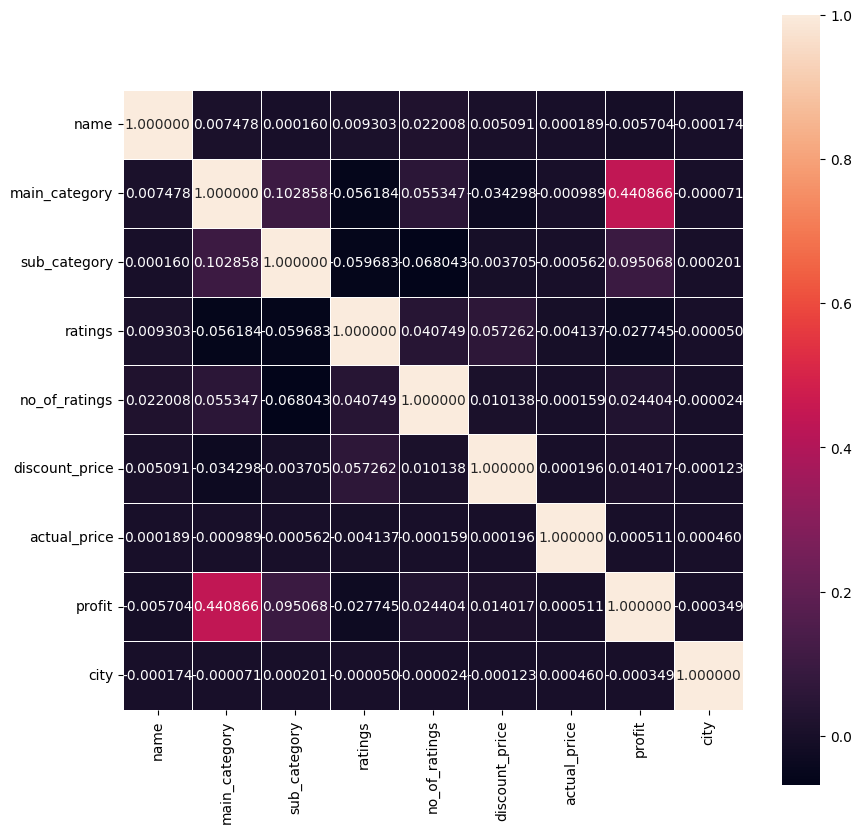

In [14]:
# Correlation among the attributes in the dataset
correlation_matrix = augmented_dataFrame.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlation_matrix, vmax = 1, square = True, annot=True,fmt = ".6f", linewidth=.5);